# **Context**


A dataset contains some customers who are withdrawing their account from the bank due to some loss and other issues.
With this data we try to analyze those customers' behavior and predict who is more likely to churn by using **Artificial Neural Network (ANN)**.

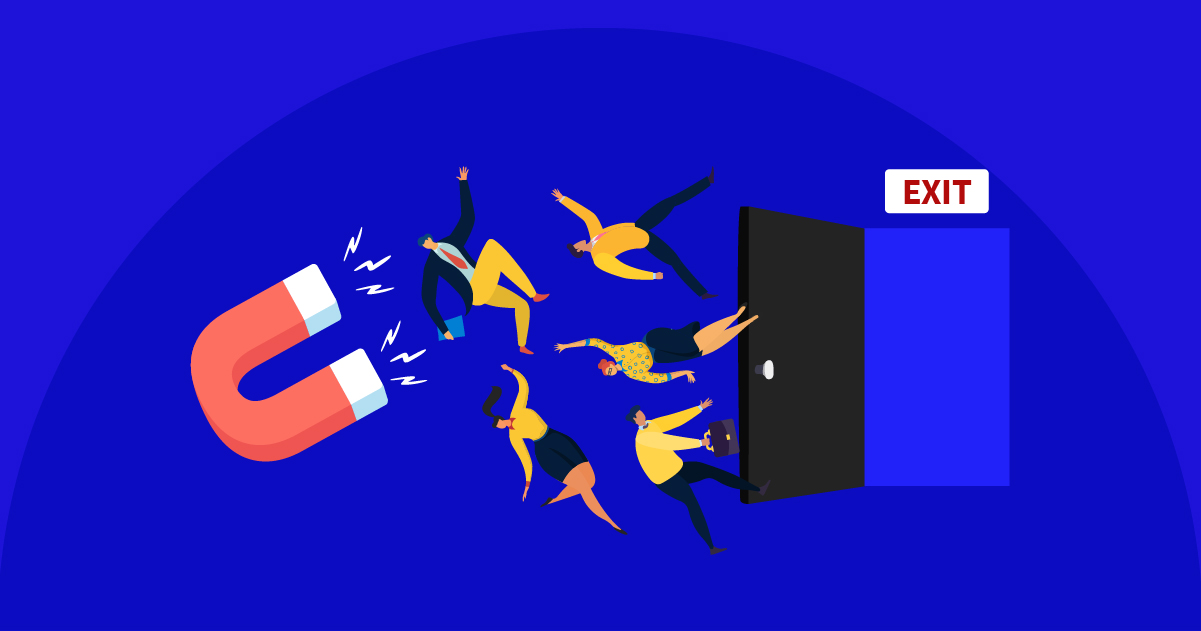

# **Overview**

- **CustomerId**: the customer identifier.
- **Surname**: the surname of a customer.
- **CreditScore**: a score with a range between 300 and 850, a credit score of 700 or above is generally considered good. A score of 800 or above on the same range is considered to be excellent.
- **Geography**: customer location.
- **Gender**: customer gender.
- **Age**: customer age.
- **Tenure**: refers to the number of years that the customer has been a client of the bank.
- **Balance**: the amount of balance in the credit card.
- **NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**: denotes whether or not a customer has a credit card.
- **IsActiveMember**: denotes whether or not a customer is active or not.
- **EstimatedSalary**: the estimated amount of the customer salary.
- **Complain**: customer has complaint or not.
- **Satisfaction Score**: Score provided by the customer for their complaint resolution (1 -5).
- **Card Type**: type of card hold by the customer.
- **Points Earned**: the points earned by the customer for using credit card.
- **Exited**: whether or not the customer left the bank.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend


random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Customer_Churn_Records.csv to Customer_Churn_Records.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Customer_Churn_Records.csv']))
df.head(3)

CustomerId Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15725737  Mosman          669       NaN    Male   46       3       0.00   
1    15755405  Hudson          710    France    Male   43       9  128284.45   
2    15603134     Pai          656     Spain  Female   40      10  167878.50   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  \
0              2          0               1          8487.75         0   
1              1          1               0         32996.89         1   
2              1          0               1        151887.16         0   

   Satisfaction Score Card Type  Point Earned  Exited  
0                   2    SILVER           665       0  
1                   5  PLATINUM           538       1  
2                   5  PLATINUM           806       0

In [ ]:
df.tail(3)

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
9997    15707144  Onyeorulu          571   Germany    Male   25       6   
9998    15684696        Lei          560     Spain  Female   26       3   
9999    15761950   Woronoff          652   Germany  Female   45       9   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
9997   82506.72              2          1               0        167705.07   
9998  116576.45              1          1               0        157567.37   
9999  110827.49              1          1               1        153383.54   

      Complain  Satisfaction Score Card Type  Point Earned  Exited  
9997         0                   3   DIAMOND           624       0  
9998         0                   4  PLATINUM           440       0  
9999         1                   3  PLATINUM           510       1

In [ ]:
df.shape

(10000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           9643 non-null   object 
 4   Gender              9854 non-null   object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           9951 non-null   object 
 15  Point Earned        10000 non-null  int64  
 16  Exite

In [ ]:
df.duplicated().sum()

0

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CustomerId            0.00
Surname               0.00
CreditScore           0.00
Geography             3.57
Gender                1.46
Age                   0.00
Tenure                0.00
Balance               0.00
NumOfProducts         0.00
HasCrCard             0.00
IsActiveMember        0.00
EstimatedSalary       0.00
Complain              0.00
Satisfaction Score    0.00
Card Type             0.49
Point Earned          0.00
Exited                0.00
dtype: float64


- In the above dataset, we have **17 features** , **10,000 observations** , and the target variable is **Exited**.
- **Geography, Gender, Card Type and Surname** have data type as object, while all the other features are numerical.
- There's not duplicate values, but there are missing values in the **Geography, Gender and Card Type** columns.


In [ ]:
df.Exited.value_counts(normalize=True)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

- There are **79%** of customers who don't churn, while **20%** of them churned.
- It's unbalanced data.

## **Data Preprocesing and EDA**

- First, we will drop **CustomerId and Surname** columns since it's not necessary for our analysis.

In [ ]:
df.drop(columns=['CustomerId', 'Surname'], inplace=True)

- We will explore the numerical variables.

In [ ]:
df.describe().transpose()

count           mean           std     min       25%  \
CreditScore         10000.0     650.528800     96.653299  350.00    584.00   
Age                 10000.0      38.921800     10.487806   18.00     32.00   
Tenure              10000.0       5.012800      2.892174    0.00      3.00   
Balance             10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts       10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard           10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember      10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary     10000.0  100090.239881  57510.492818   11.58  51002.11   
Complain            10000.0       0.204400      0.403283    0.00      0.00   
Satisfaction Score  10000.0       3.013800      1.405919    1.00      2.00   
Point Earned        10000.0     606.515100    225.924839  119.00    410.00   
Exited              10000.0       0.203800      0.402842    0.00      0.00   

                           50%          75%        max  
CreditScore            652.000     718.0000     850.00  
Age                     37.000      44.0000      92.00  
Tenure                   5.000       7.0000      10.00  
Balance              97198.540  127644.2400  250898.09  
NumOfProducts            1.000       2.0000       4.00  
HasCrCard                1.000       1.0000       1.00  
IsActiveMember           1.000       1.0000       1.00  
EstimatedSalary     100193.915  149388.2475  199992.48  
Complain                 0.000       0.0000       1.00  
Satisfaction Score       3.000       4.0000       5.00  
Point Earned           605.000     801.0000    1000.00  
Exited                   0.000       0.0000       1.00

**Insights**

- The AVG of credit score of the customers is **650 out of 850** , and some customers have  excellent scores for credit card score.
- The AVG customer age is **~39 years old** , and deviates from the average by **10 years**.
- The AVG duration of the customer being a client of the bank is **5 years**.
- The AVG amount of the balance in the credit card is approx **76486** , and the maximum amount of the balance is **250898**.
- The AVG number of products that a customer has purchased through the bank is **one product**.
- On average, most of the customers **have a credit card** , and they are **active members**.
- The AVG amount of the estimated salary is **100090** , and deviates from the average by **57510**.
- Most of the customers **didn't complaint before**.
- The AVG satisfaction score is **3**, and there's even some customers who have **the highest satisfaction level (5)**.
- The AVG point earned by customers is **606 points**.
- As we observed before, most of the customers **don't churn**.

- Now let us explore the categorical variables.

In [ ]:
for i in df.describe(include=["object"]).columns:
    print("The proportion of values in", i, "are :")
    print(df[i].value_counts(normalize=True))
    print("--" * 25)

The proportion of values in Geography are :
France     0.501918
Germany    0.250752
Spain      0.247330
Name: Geography, dtype: float64
--------------------------------------------------
The proportion of values in Gender are :
Male      0.546276
Female    0.453724
Name: Gender, dtype: float64
--------------------------------------------------
The proportion of values in Card Type are :
DIAMOND     0.250427
GOLD        0.250126
PLATINUM    0.249824
SILVER      0.249623
Name: Card Type, dtype: float64
--------------------------------------------------


**Insights**

- In this dataset, we have customers from three different locations and almost the majority of them are from France.
- There are more males than females.
- For the card type, all the types are approximately the same.

### **Univariate Analysis**

In [ ]:
plt.style.use('ggplot')


def histogram_boxplot_func(data, feature, figsize=(8, 6), kde=True, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

- **Credit Card Score Variable**

In [ ]:
histogram_boxplot_func(df, 'CreditScore')

**Insights**
- The distribution of the credit score is approximate to normal distribution with a few outliers in the left side (low values).
- Most of the customers have good credit card scores, while a few of them have poor credit card scores.

- **Age Variable**

In [ ]:
histogram_boxplot_func(df, 'Age')

**Insights**
- The distribution of the age is normal distribution with a long tail in the right side, and has mode in the 40 years old means there are a lot of the customers in the forties in this dataset , also, a few outliers in the right side (older customers).
- Generally, most customers are in their thirties and forties.

- **Tenure Variable**

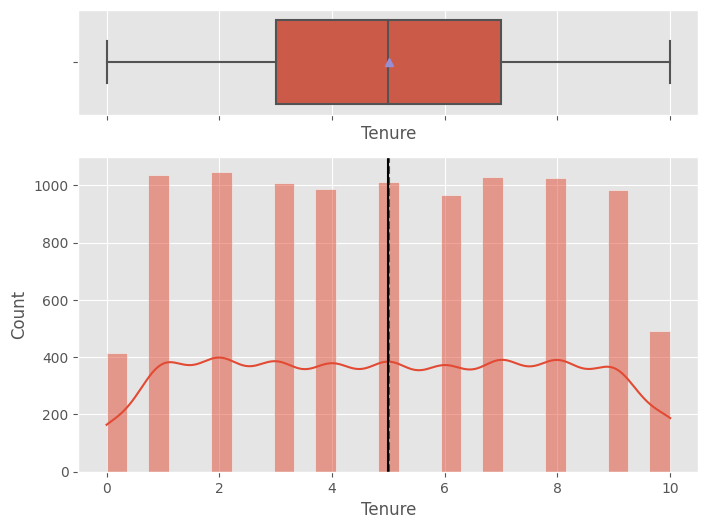

In [ ]:
histogram_boxplot_func(df, 'Tenure')

**Insights**
- The distribution of the tenure is uniformly distributed.
- There are less customers who have either 0 or 10 years with the bank.


- **Balance Variable**

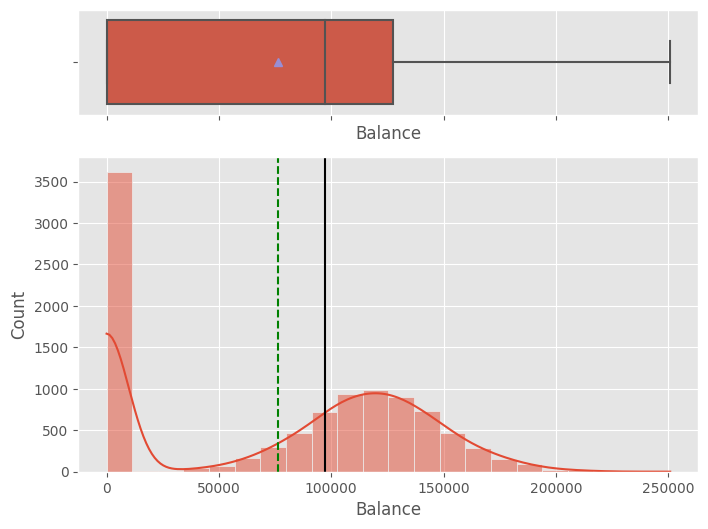

In [ ]:
histogram_boxplot_func(df, 'Balance')

**Insights**
- The distribution of the balance is a normal distribution with a mode of low balance.
- We can observe that more than 3000 customers have a balance under 50000 in their credit card.


- **Numer Of Products Variable**

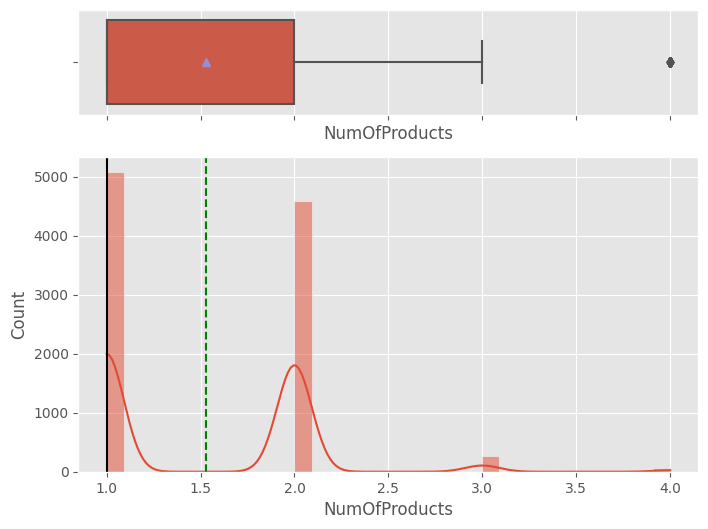

In [ ]:
histogram_boxplot_func(df, 'NumOfProducts')

**Insights**
- The distribution of the number of products that a customer has purchased through the bank is bimodal distribution.
- Customers are less likely to purchase more than two products.

- **Has Credit Card Variabe**

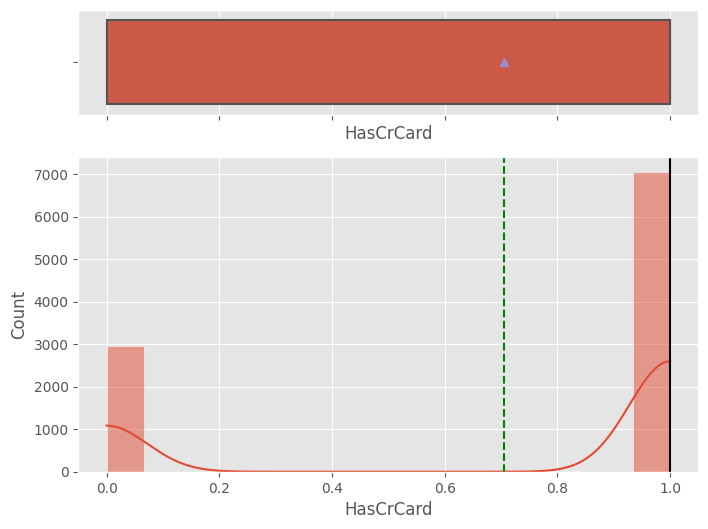

In [ ]:
histogram_boxplot_func(df, 'HasCrCard')

**Insight**

- Most customer have a credit card.

- **Is Active Member Variable**

In [ ]:
histogram_boxplot_func(df, 'IsActiveMember')

**Insight**

- Active and inactive customers are almost the same, with slightly more of active than the inactive customers.

- **Estimated Salary Variable**

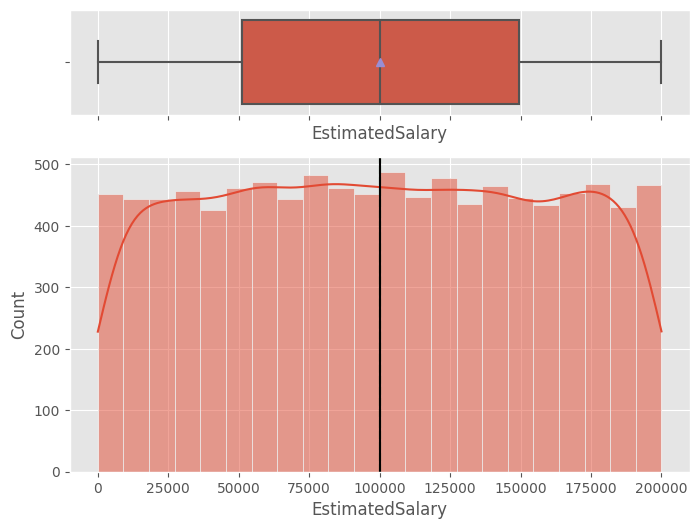

In [ ]:
histogram_boxplot_func(df, 'EstimatedSalary')

**Insights**

- The distribution of estimated salary is a uniform distribution.
- All the estimated salaries have the same number of customers.

- **Complain Variable**

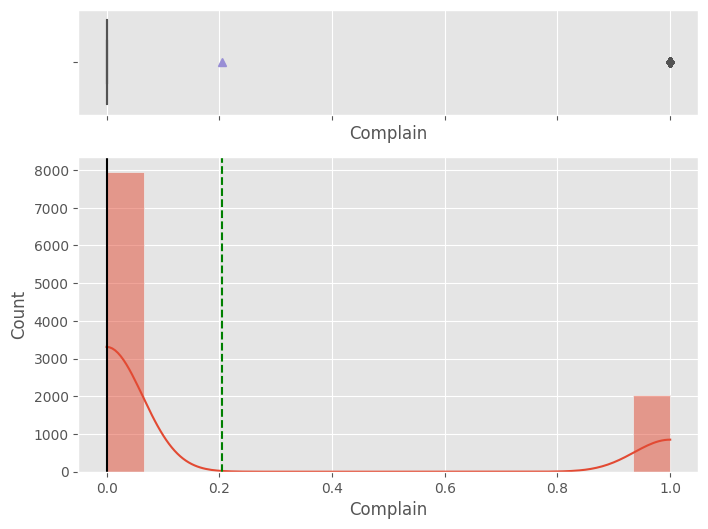

In [ ]:
histogram_boxplot_func(df, 'Complain')

**Insight**

- Most customers didn't complain before about the bank services.

- **Satisfaction Score Variable**

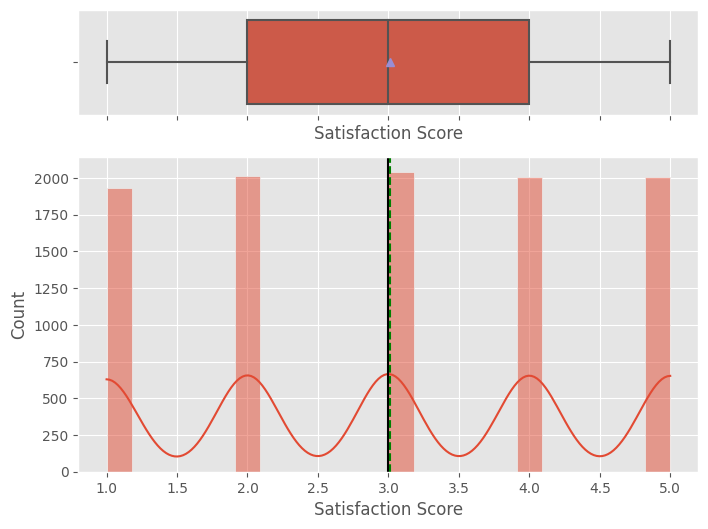

In [ ]:
histogram_boxplot_func(df, 'Satisfaction Score')

**Insight**

- Since the satisfaction score system doesn't have (0.5), we can say the distribution of scores is uniform.
- We have an approximate number of less satisfied, satisfied and very satisfied customers in this dataset.

- **Point Earned  Variable**

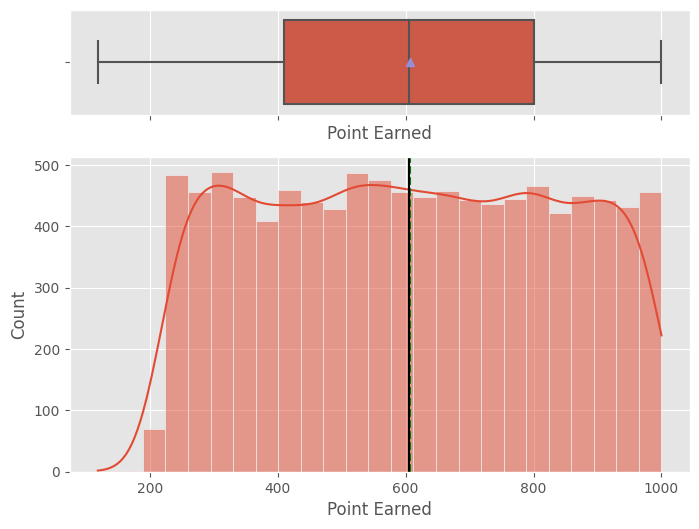

In [ ]:
histogram_boxplot_func(df, 'Point Earned')

**Insight**
- The distribution of the points earned is uniformly distributed.
- There are no much variation in the points earned by customers, however there are a few customers who earned only 200 points.

- **Exited Variable**

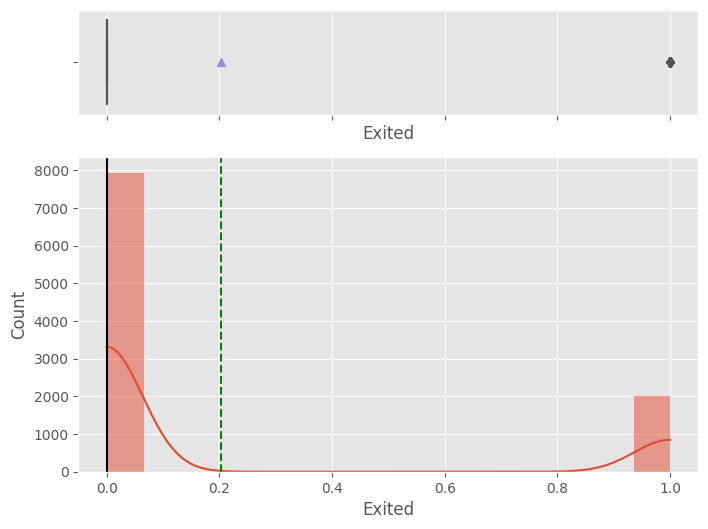

In [ ]:
histogram_boxplot_func(df, 'Exited')

**Insight**

- There are a few number of customers who churned , in comparison to the customers who didn't.

In [ ]:
def labeled_barplot_func(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 6, 4))
    else:
        plt.figure(figsize=(n + 6, 4))

    plt.xticks(fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

- **Geography Variable**

In [ ]:
labeled_barplot_func(df, 'Geography')

**Insight**

- The majority of customers are from France.

- **Gender Variable**

In [ ]:
labeled_barplot_func(df, 'Gender')

**Insight**

- As we observed before, there are more males than females in this dataset.

- **Card Type Variable**

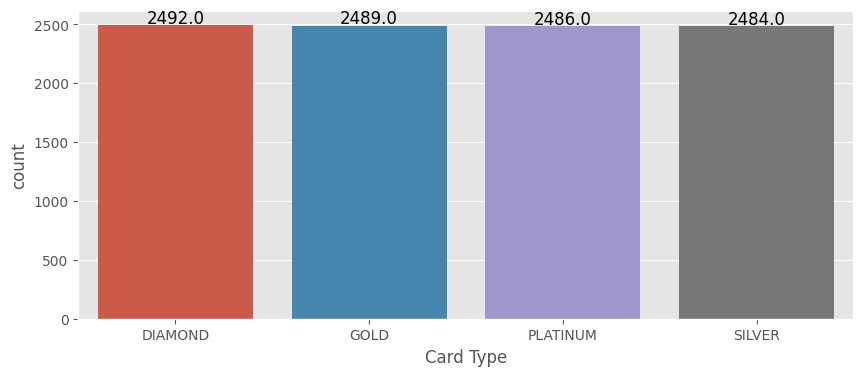

In [ ]:
labeled_barplot_func(df, 'Card Type')

**Insight**

- As we observed before, approximately all the card types have the same number of customers.


In [ ]:
print(df.Exited.value_counts())
labels = ['churn', 'didn\'t churn']
colors = sns.color_palette('pastel')[0:15]
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Proportion of customers who churn Vs. didn\'t churn", size = 10)
plt.show()

0    7962
1    2038
Name: Exited, dtype: int64


- This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
- Only 20% of the customers in this dataset actually did churn.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### **Bivariate Analysis**

In [ ]:
#sns.pairplot(df, hue='Exited')

In [ ]:
def distribution_plot_wrt_target_func(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1]
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False
    )

    plt.tight_layout()
    plt.show()

- **CreditScore Vs. Exited**

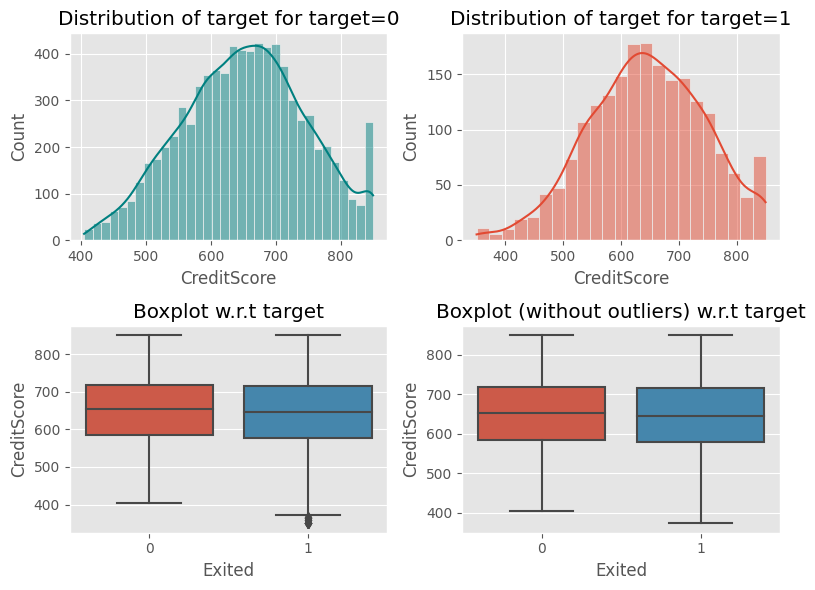

In [ ]:
distribution_plot_wrt_target_func(df, 'CreditScore', 'Exited')

**Insight**

- For those customers who churn and those who didn't , the credit card scores are the same, but we can see some of the customers who did churn have poor credit card scores.

- **Age Vs. Exited**

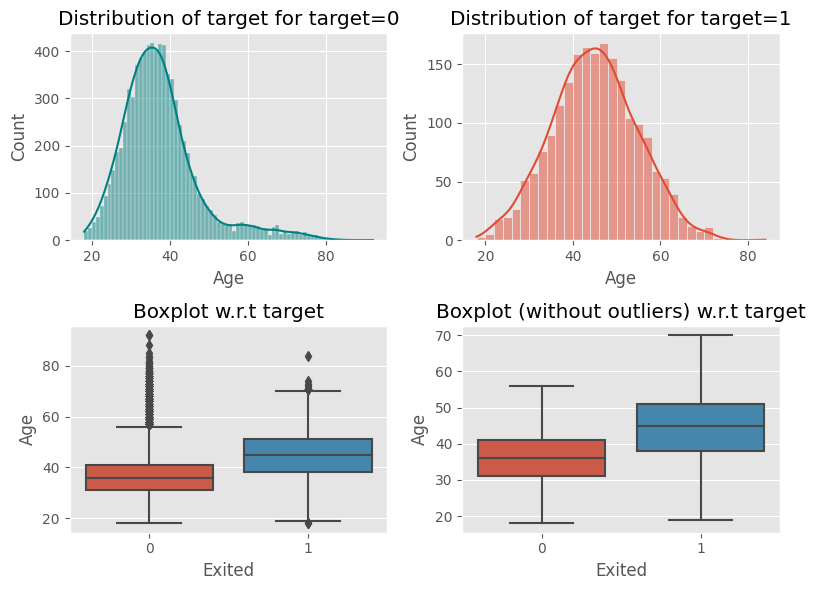

In [ ]:
distribution_plot_wrt_target_func(df, 'Age', 'Exited')

**Insight**

- Customers who usually did churn are those who are in their 40s or 50s, while those who are above 60 years old are less likely to churn.

- **Tenure Vs. Exited**

In [ ]:
distribution_plot_wrt_target_func(df, 'Tenure', 'Exited')

**Insight**

- All tenure years are the same for those customers who did churn and who didn't, and we can notice that no one customer with the bank for 5 years who did churn.

- **Balance Vs. Exited**

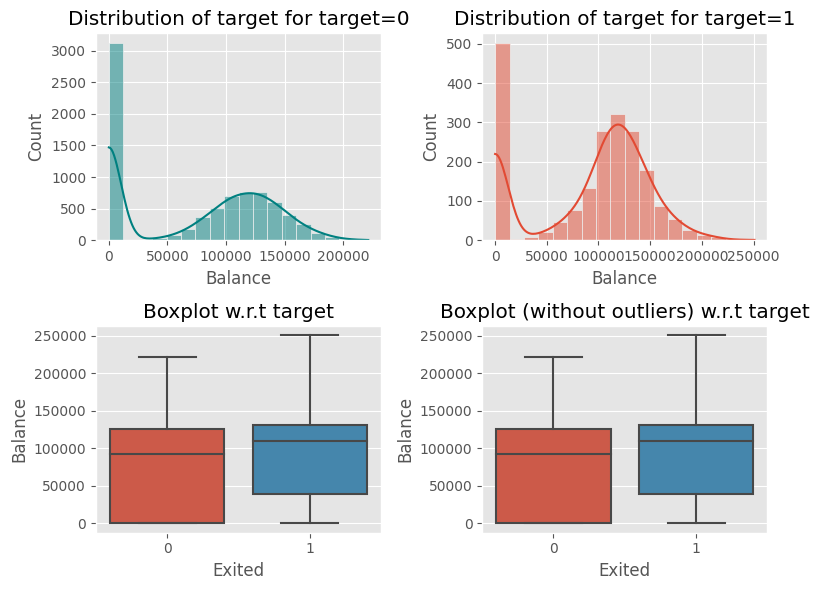

In [ ]:
distribution_plot_wrt_target_func(df, 'Balance', 'Exited')

**Insight**

- Although the amount of the balance in the credit card for the customers is almost the same for those who did churn and who didn't. We can observe that , Customers who did churn are usually those who have a high balance 50000 or above.

- **NumOfProducts Vs. Exited**

In [ ]:
distribution_plot_wrt_target_func(df, 'NumOfProducts', 'Exited')

**Insights**

- Customers who did churn are less likely to buy a second product from the bank. Also, we can notice that there is one customer who decided to churn even after he/she bought four of the bank's products.

- Customers who did buy two of the bank's products are less likely to churn.


- **HasCrCard Vs. Exited**

In [ ]:
distribution_plot_wrt_target_func(df, 'HasCrCard', 'Exited')

**Insight**

- There's not much differentiation between those who did churn and those who didn't in terms of having a credit card or not (so, we can drop this variable later on).

- **IsActiveMember Vs. Exited**

In [ ]:
distribution_plot_wrt_target_func(df, 'IsActiveMember', 'Exited')

**Insight**

- Most customers who did churn are actually those ones who are not active members.

- **EstimatedSalary Vs. Exited**

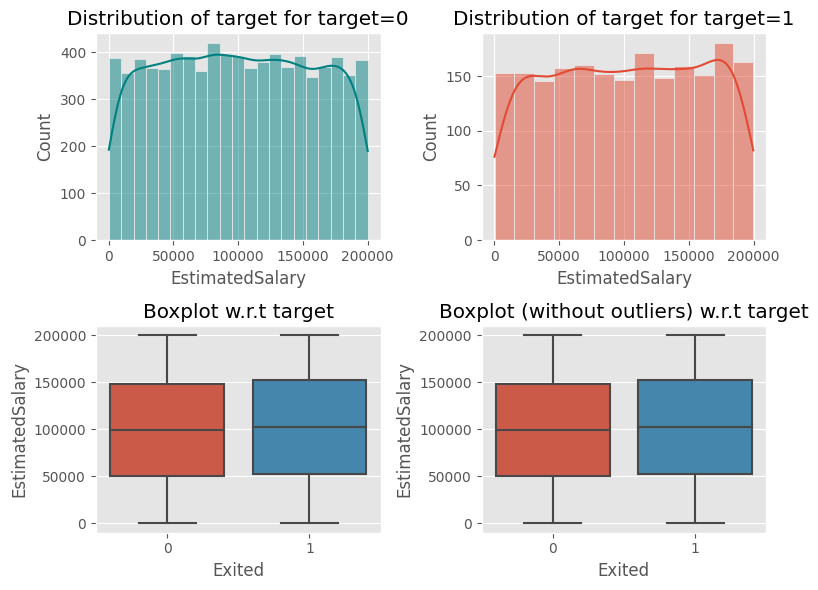

In [ ]:
distribution_plot_wrt_target_func(df, 'EstimatedSalary', 'Exited')

**Insight**

- There's no clear pattern or something insightful in the estimated salary variable, thus we can drop it later on.

- **Complain Vs. Exited**

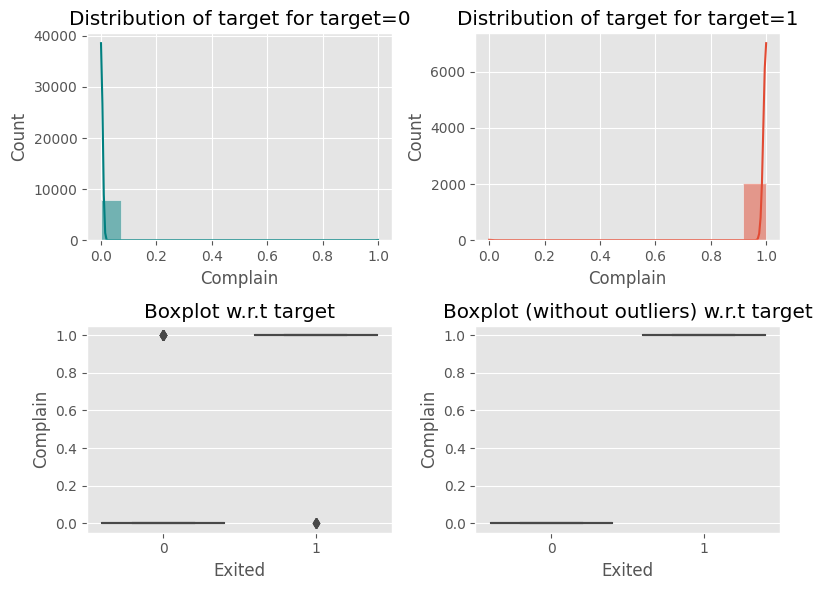

In [ ]:
distribution_plot_wrt_target_func(df, 'Complain', 'Exited')

**Insight**

- Obviously, customers who did churn are those who made a complaint before than those who didn't, which is reasonable. **(it’s important predictor)**

- **Satisfaction Score Vs. Exited**

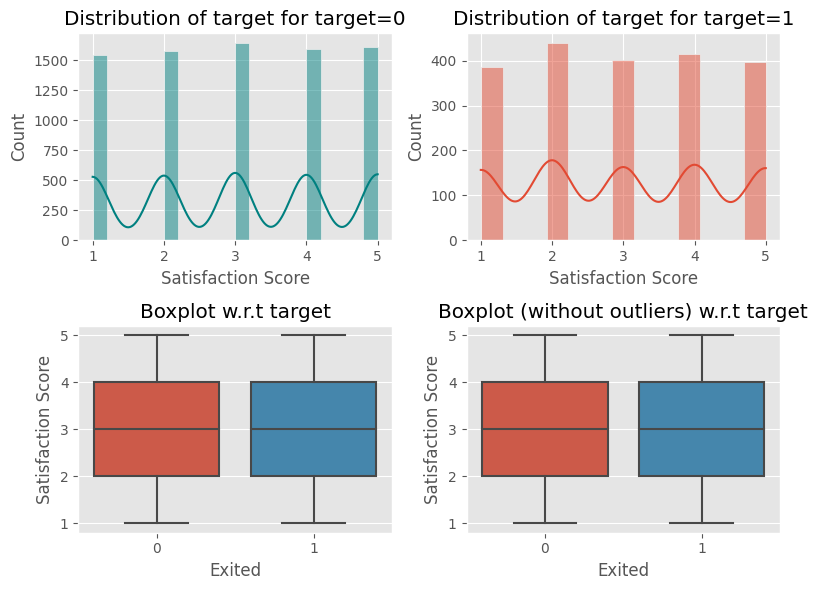

In [ ]:
distribution_plot_wrt_target_func(df, 'Satisfaction Score', 'Exited')

**Insight**

- There's no clear pattern between those who did churn and those who didn't in terms of satisfaction scores (so, we can drop this variable later on).

- **Point Earned Vs. Exited**

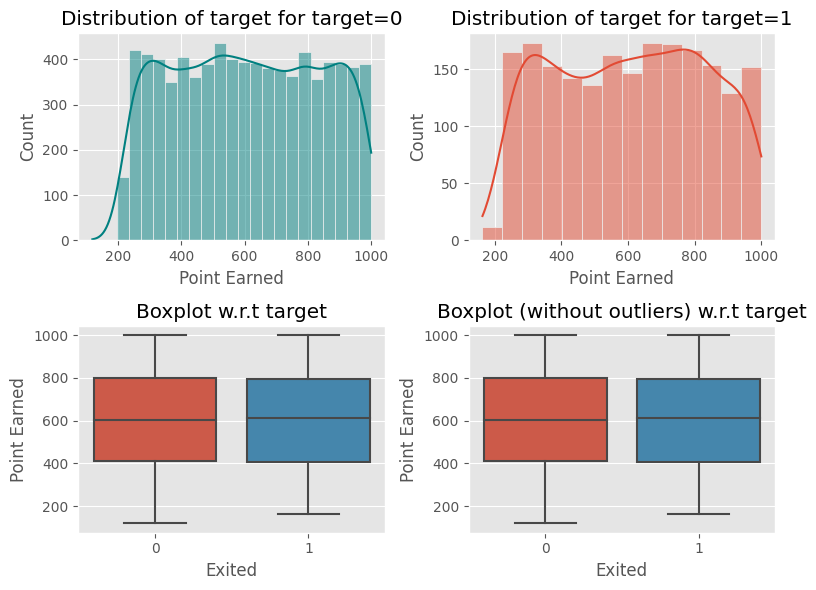

In [ ]:
distribution_plot_wrt_target_func(df, 'Point Earned', 'Exited')

**Insight**

- There's not much differentiation between those who did churn and those who didn't in terms of points earned (so, we can drop this variable later on).

In [ ]:
def stacked_barplot_func(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 70)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

- **Geography Vs. Exited**

Exited        0     1   All
Geography                  
All        7672  1971  9643
Germany    1630   788  2418
France     4053   787  4840
Spain      1989   396  2385
----------------------------------------------------------------------


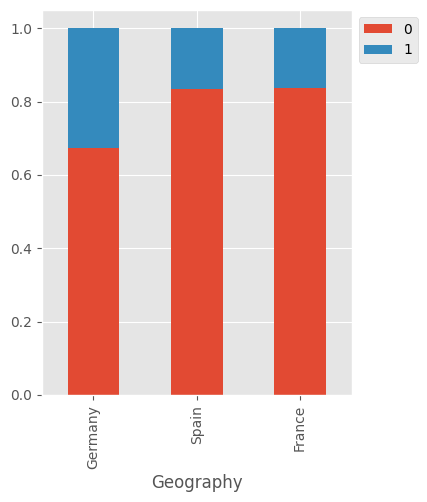

In [ ]:
stacked_barplot_func(df, 'Geography', 'Exited')

**Insight**

- About **30% or slightly more** of the customers who did churn are from Germany.

- **Gender Vs. Exited**

Exited     0     1   All
Gender                  
All     7850  2004  9854
Female  3352  1119  4471
Male    4498   885  5383
----------------------------------------------------------------------


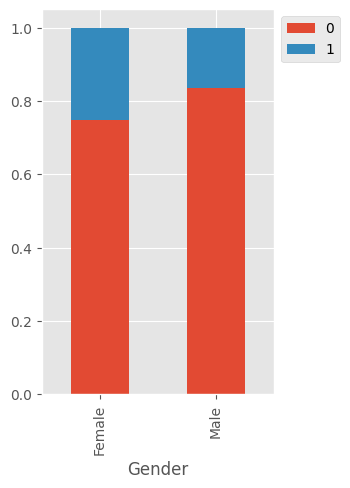

In [ ]:
stacked_barplot_func(df, 'Gender', 'Exited')

**Insight**

- **~25%** of the customers who did churn are females.

- **Card Type Vs. Exited**

Exited        0     1   All
Card Type                  
All        7924  2027  9951
DIAMOND    1950   542  2492
PLATINUM   1980   506  2486
SILVER     1985   499  2484
GOLD       2009   480  2489
----------------------------------------------------------------------


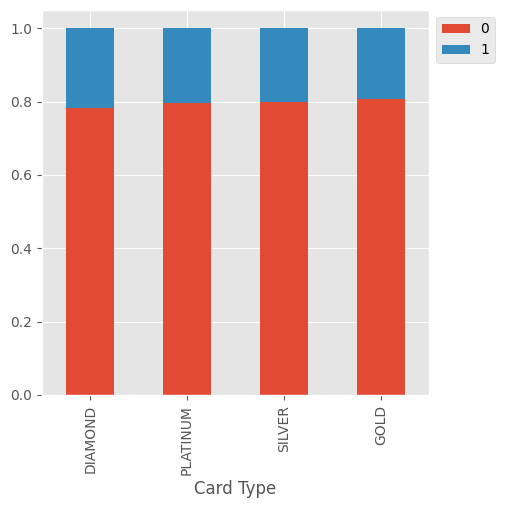

In [ ]:
stacked_barplot_func(df, 'Card Type', 'Exited')

**Insight**

- We can notice, there are slightly more of customers who did churn and have a credit card of type Diamond then the other types.

*This variable has missing values and is categorical, so we need to encode it, but since it isn't very uniquely defined to predict the churn it isn't worth doing all the processing, then we will drop it later.*

In [ ]:
to_drop_cols = ['HasCrCard', 'EstimatedSalary', 'Satisfaction Score', 'Card Type', 'Point Earned']

df.drop(columns=to_drop_cols, inplace=True)

In [ ]:
df.shape

(10000, 10)

### **Data Preprocessing**

- **Handling the missing values**

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
df[['Geography', 'Gender']] = imputer_mode.fit_transform(df[['Geography', 'Gender']])

In [ ]:
df.isnull().sum()

CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
Balance           0
NumOfProducts     0
IsActiveMember    0
Complain          0
Exited            0
dtype: int64

- **Encoding the categorical variables**

In [ ]:
encoded_df = pd.concat([df, pd.get_dummies(df[['Geography', 'Gender']], prefix = ['Geography', 'Gender'])], axis=1)

#drop the original columns
encoded_df.drop(columns=['Geography', 'Gender'], inplace=True)

encoded_df.head(3)

CreditScore  Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0          669   46       3       0.00              2               1   
1          710   43       9  128284.45              1               0   
2          656   40      10  167878.50              1               1   

   Complain  Exited  Geography_France  Geography_Germany  Geography_Spain  \
0         0       0                 1                  0                0   
1         1       1                 1                  0                0   
2         0       0                 0                  0                1   

   Gender_Female  Gender_Male  
0              0            1  
1              0            1  
2              1            0

## **Data Preparation and Model Building**

In [ ]:
feauters = encoded_df.drop(['Exited'], axis=1)

target = encoded_df.Exited

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(feauters, target, test_size=0.3, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7000, 12), (3000, 12), (7000,), (3000,))

*Before we move on the building  the model, there are some important points to consider:*

- Due to an unbalanced data, we may suffer some bias in the final results, that happens when the model performing very well in predicting those customers who will not churn since it has more observations for this particular class **(Major Class)**, and it 's very poor in predicting those customers who will churn **(Minor Class)** which are the targeted customers for this problem.


- **False Positive - FP (Type I Error) and False Negative - FN (Type II Errors)** it is hard to avoid the prediction errors, so we will try to minimize them as much as possible .

- What we mean by **FP** when we predict a customer who will not be planning to leave, and **FN** when we predict a customer who is planning to leave to not leave.


 - It's crucial to the bank which actually wants to predict the customers who really  intend to leave and don't waste the time on those who will not. For shorthand, the bank may end up spending time and resources on the wrong customers who don't plan to leave while they lose customers who are actually planning to leave.

 -  Both **False Positive Rate** and **False Negative Rate** are costly and bad. In which the bank either the wasting the resources or losing the customers, if we have a high false positive rate that means the bank will spend the time and efforts in the wrong direction as they will have to do the same treatment to prevent those certain customers who the model predict them as customers who are planning to leave when they are not, while losing the actual customers who are really planning to leave. And if we have a high false negative rate that means the model failed to predict those customers who are planning to leave and the bank will end up losing their customers without them knowing.

### **Confusion Matrix Function**

In [ ]:
def make_confusion_matrix_func(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Reds',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)


    if title:
        plt.title(title)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### **Model V1 Function**

The function body contains:

- ANN model with 3 layers architecture with using **Relu** as activation function in the hidden layer, and **Sigmoid** for the output layer.
- We will use **BatchNormalization()** to normalize the layers' inputs by re-centering and re-scaling (we can use Dropout() to avoid overfitting, but for this particular case we will use BatchNormalization() as it works better with the data we have).
- We will use callback in keras to help us in a proper training of the model. We will use this callback **ReduceLROnPlateau** to reduce the learning rate when the validation loss has stopped improving.
- It will return a plot of **Accuracy and Loss** during the training.
- For this model version the batch size that will be used here is **Mini Batch Gradient Descent**.
- **ROC-AUC Curve** will be used to select the optimal threshold.
- Finally, it will display the **confusion matrix and the classification report** of the predictions (for unseen data/test data) to evaluate the performance.


*We will use different optimizers and number of epochs to identify the best solution.*

In [ ]:
def ANN_classifier_V1_func(optimizer, inds_train, target_train , inds_test, target_test, n_epochs, n_batchsize, n_verbose):

  #model building
  model = Sequential()
  #1st layer
  model.add(Dense(64, activation='relu', input_shape=(12,)))
  model.add(BatchNormalization())
  #2nd layer
  model.add(Dense(32, activation='relu'))
  model.add(BatchNormalization())
  #output layer
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer=optimizer , metrics=['accuracy'])
  print('---------------Model Summary---------------')
  print()
  print(model.summary())

  #training the model
  print('---------------Training Process--------------')
  from keras.callbacks import ReduceLROnPlateau

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.1)

  history = model.fit(inds_train, target_train, validation_split=0.2,
                      batch_size=n_batchsize, epochs=n_epochs, callbacks=[reduce_lr], verbose=n_verbose)

  history_df  = pd.DataFrame(history.history)
  history_df['epochs'] = history.epoch

  fig , (ax1, ax2) = plt.subplots(nrows=2,ncols=1, figsize=(8, 8))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('Learning History')
  ax1.set_ylabel('Accuracy')
  ax1.legend(['Train', 'Validation'], loc='lower right')

  ax2.plot(history_df['loss'])
  ax2.plot(history_df['val_loss'])
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epochs')
  ax2.legend(("train" , "validation") , loc =0)
  plt.show()

  #Printing results
  results = model.evaluate(inds_test, target_test)
  print('\n')

  #ROC_Curve
  from sklearn.metrics import roc_curve
  from matplotlib import pyplot

  print('---------------ROC-AUC Curve---------------')
  print()
  pred = model.predict(inds_test)
  pred = pred[:, 0]
  fpr, tpr, thresholds = roc_curve(target_test, pred)
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
  pyplot.plot(fpr, tpr, marker='.')
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  pyplot.show()

  predications = model.predict(inds_test)
  predications = (predications > thresholds[ix])

  #confusion_matrix #classfication_report
  from sklearn.metrics import confusion_matrix
  from sklearn import metrics

  print()
  print('---------------Classfication Report---------------')
  print()
  cr = metrics.classification_report(target_test, predications)
  print(cr)

  print()
  print('---------------Confusion Matrix---------------')
  print()

  cm = confusion_matrix(target_test, predications)

  labels = ['True Positive', 'False Positive', 'False Negative','True Negative']

  categories = [ 'Didn\'t Churn','Churn']

  make_confusion_matrix_func(cm ,
                      group_names = labels,
                      categories = categories,
                      cmap ='Reds')
  return  history, make_confusion_matrix_func

- **Model 1**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

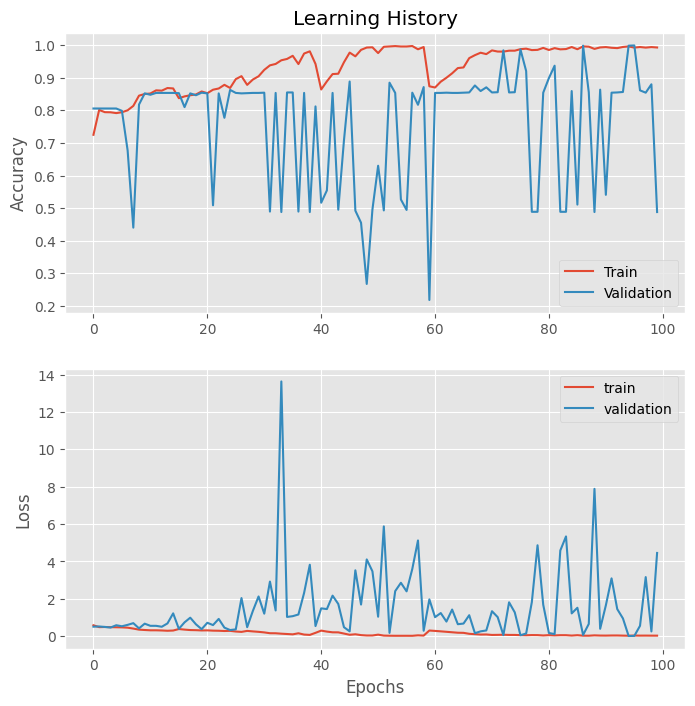

94/94 [==============================] - 0s 1ms/step - loss: 4.2415 - accuracy: 0.5240


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.999992, G-Mean=0.809


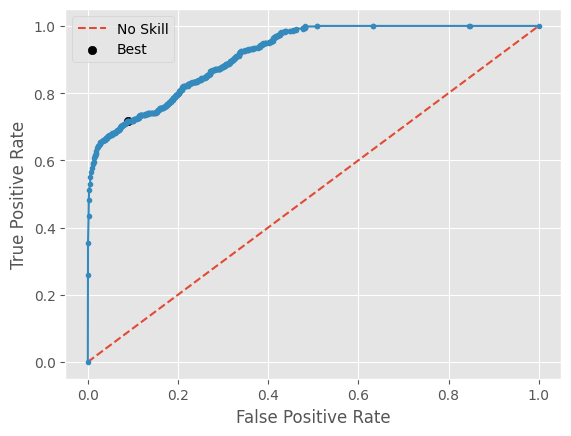

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2380
           1       0.68      0.72      0.70       620

    accuracy                           0.87      3000
   macro avg       0.80      0.81      0.81      3000
weighted avg       0.87      0.87      0.87      3000


---------------Confusion Matrix---------------



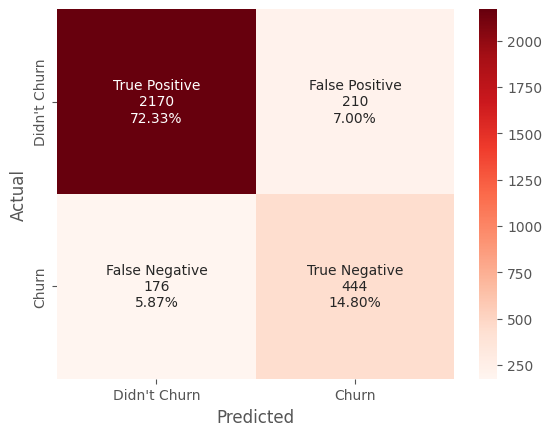

(<keras.callbacks.History at 0x7efe58d49930>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_1 = ANN_classifier_V1_func('adamax' , X_train, y_train, X_test, y_test, 100, 32, 2)
model_1

**Summary**

- In learning history plots, there's a lot of noise in both the validation dataset, and we can notice that the training line is getting a higher accuracy, while the validation line doesn't seems to be growing, thus there's a risk of overfitting behavior here since there's a significant difference between the training and validation lines, so it's advisable to stop training our data with this model.

- The overall accuracy is **87%**, and the recall of class 0 is **91%**, but the recall of class 1 is less than that **72%**.

- It's important that we have a good recall ( **True Negative** the measure of specificity for this case) for the class 1, and without risking to decrease the other metrics by much (we need a balanced performance), so we need to try to improve the model performance more further.


- **Model 2**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

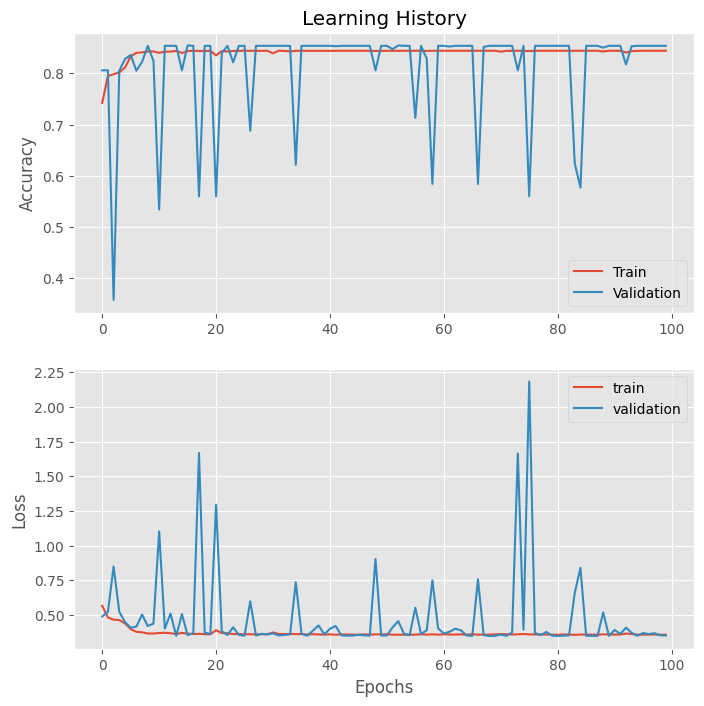

94/94 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8470


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.256027, G-Mean=0.645


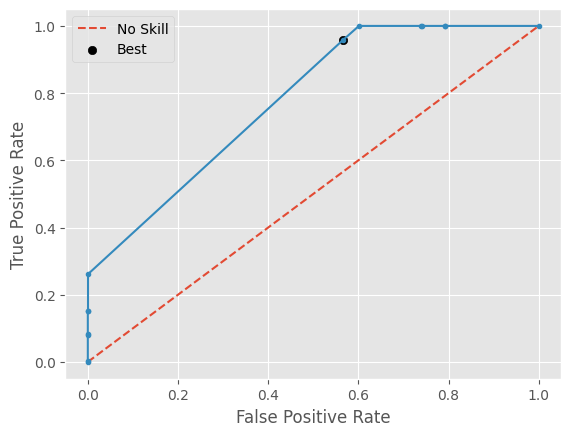

94/94 [==============================] - 0s 2ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2380
           1       0.99      0.26      0.41       620

    accuracy                           0.85      3000
   macro avg       0.92      0.63      0.66      3000
weighted avg       0.87      0.85      0.81      3000


---------------Confusion Matrix---------------



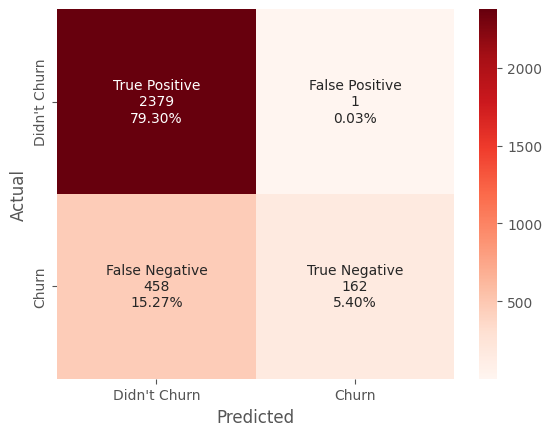

(<keras.callbacks.History at 0x7e01bfa13d60>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_2 = ANN_classifier_V1_func('adam' , X_train, y_train, X_test, y_test, 100, 32, 2)
model_2

**Summary**


- In learning history plots, the training line keeps going in the same direction, while the validation line looks unstable (has a noise).

- The overall accuracy is **85%** which is consider to be a slightly less than our previous model, although this model did a really good job at only predicting those customers who will not churn, while it performed very poorly in predicting the customers who are truly planning to leave, and who they are the banks targeted customers (matter the most).

- With this model we were only able to predict the **162** of customers who are planning to leave, while the bank will end up losing the other **458** customers who are actually planning to leave as well.


- As a trade off, we were able to improve the recall of the class 0 which is the dominant class, but we ended up decreasing the recall of the important class to predict (class 1) which is the minor class too, so we will try with the other optimizers and hopefully we will be able to improve the model performance more further.

- **Model 3**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

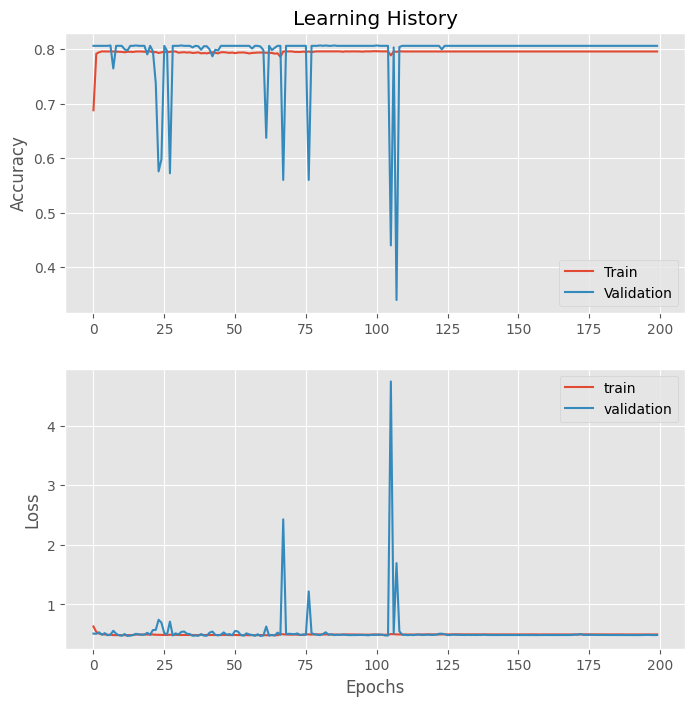

94/94 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7933


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.231849, G-Mean=0.569


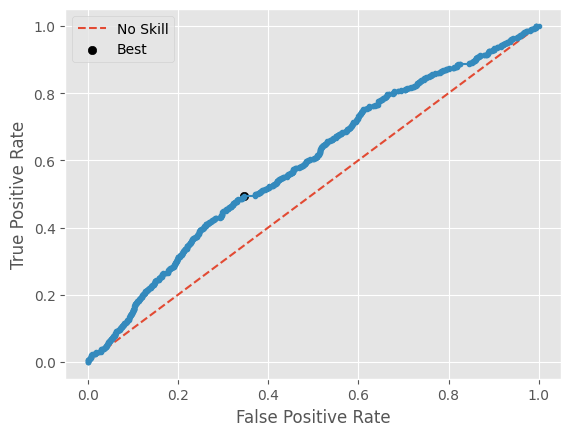

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.83      0.65      0.73      2380
           1       0.27      0.49      0.35       620

    accuracy                           0.62      3000
   macro avg       0.55      0.57      0.54      3000
weighted avg       0.72      0.62      0.65      3000


---------------Confusion Matrix---------------



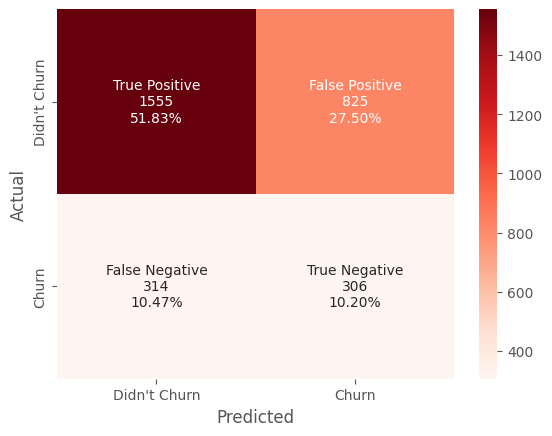

(<keras.callbacks.History at 0x7e01bf4ef8e0>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_3 = ANN_classifier_V1_func('SGD' , X_train, y_train, X_test, y_test, 200, 64, 2)
model_3

**Summary**

- In learning history plots, both training and validation lines are almost smooth, but there are some spikes/dips in the validation line (noise).

- Using the **Stochastic Gradient Descent - SGD** optimizer with 200 epochs actually made the model performance measurements to drop, which doesn't make it the best optimization option.

- **Model 4**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

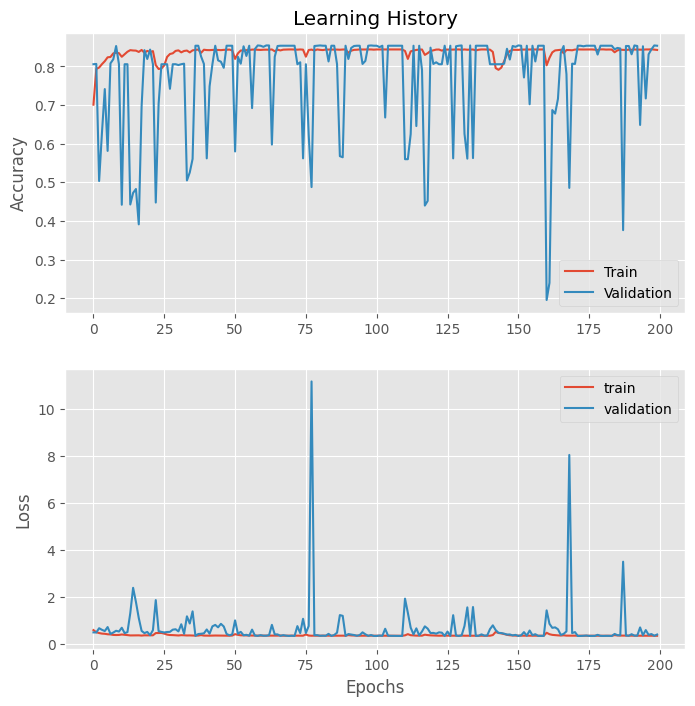

94/94 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8460


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.079270, G-Mean=0.687


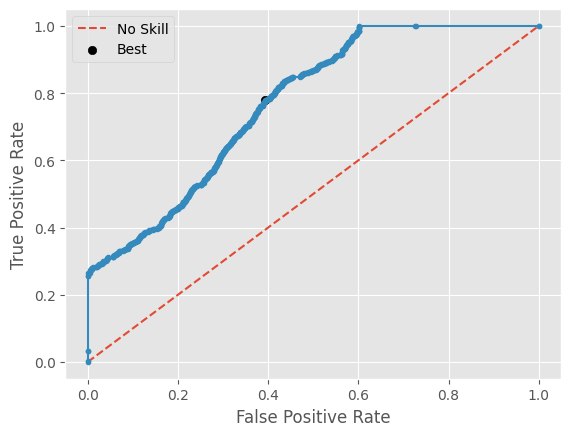

94/94 [==============================] - 0s 2ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.91      0.61      0.73      2380
           1       0.34      0.78      0.47       620

    accuracy                           0.64      3000
   macro avg       0.63      0.69      0.60      3000
weighted avg       0.79      0.64      0.68      3000


---------------Confusion Matrix---------------



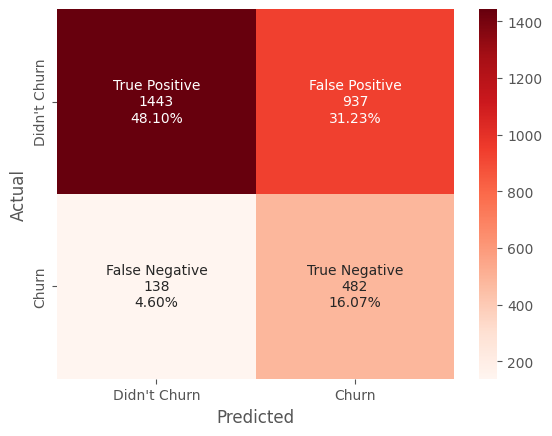

(<keras.callbacks.History at 0x7e01bf0eb850>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_4 = ANN_classifier_V1_func('RMSprop' , X_train, y_train, X_test, y_test, 200, 64, 2)
model_4

**Summary**

- In learning history plots, we can notice that the validation line has a lot of noise (peaks/valleys).
- Even if the accuracy has been improved slightly than the previous model, it's still not the highest. Also, the false positive and false negative rates are high, and we want both as low as possible.


- **Model 5**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

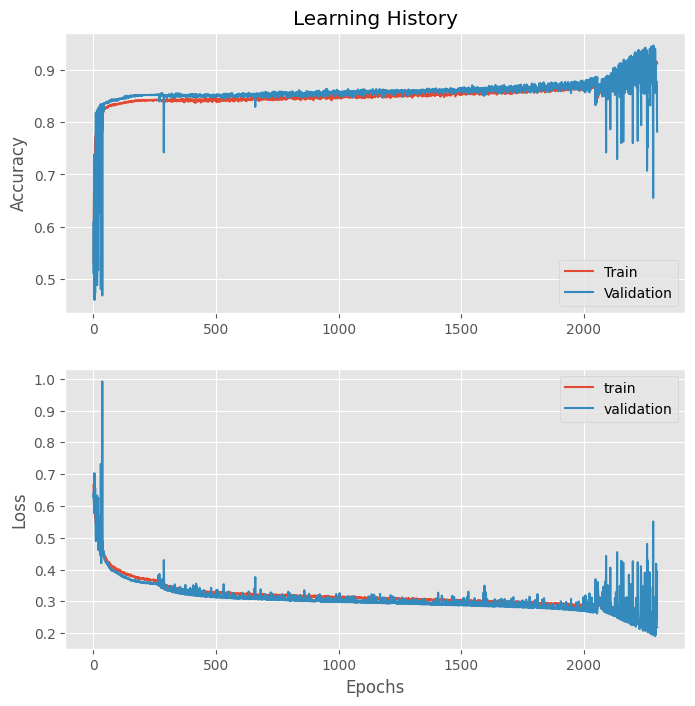

94/94 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.7867


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.716617, G-Mean=0.910


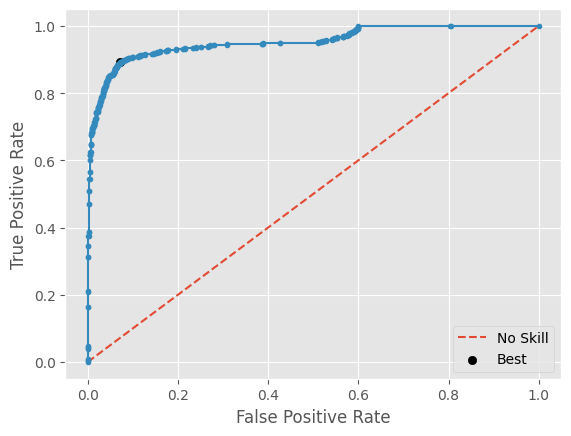

94/94 [==============================] - 0s 2ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2380
           1       0.77      0.89      0.82       620

    accuracy                           0.92      3000
   macro avg       0.87      0.91      0.89      3000
weighted avg       0.93      0.92      0.92      3000


---------------Confusion Matrix---------------



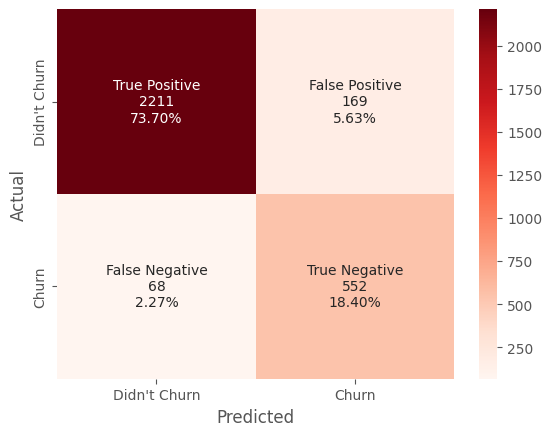

(<keras.callbacks.History at 0x7e01bf01dff0>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_5 = ANN_classifier_V1_func('Adagrad', X_train, y_train, X_test, y_test, 2300, 32, 2)
model_5

**Summary**

- Despite the fact that the model performance metrics have significantly improved, and  the false positive and false negative rates are dropped without any bias toward one class compared to all the previous optimizers.
- The learning history plots show that there's some noise within the validation line and exactly after 2000 epochs the training line looks more stable while the validation line has a lot of spikes/dips suggests that the model may have overfitting behavior if we keep running the training process more.
- So far, this model with **Adagrad** optimizer gives us a model that has generalized performance, so let us keep trying with the other optimizers.

- **Model 6**

Streaming output truncated to the last 5000 lines.
Epoch 301/2800
175/175 - 0s - loss: 0.4945 - accuracy: 0.7980 - val_loss: 0.4902 - val_accuracy: 0.8114 - lr: 0.0010 - 452ms/epoch - 3ms/step
Epoch 302/2800
175/175 - 0s - loss: 0.4926 - accuracy: 0.7970 - val_loss: 0.4931 - val_accuracy: 0.8114 - lr: 0.0010 - 421ms/epoch - 2ms/step
Epoch 303/2800
175/175 - 0s - loss: 0.4937 - accuracy: 0.7987 - val_loss: 0.4900 - val_accuracy: 0.8136 - lr: 0.0010 - 437ms/epoch - 2ms/step
Epoch 304/2800
175/175 - 0s - loss: 0.4925 - accuracy: 0.7991 - val_loss: 0.4921 - val_accuracy: 0.8129 - lr: 0.0010 - 420ms/epoch - 2ms/step
Epoch 305/2800
175/175 - 1s - loss: 0.4912 - accuracy: 0.8007 - val_loss: 0.4902 - val_accuracy: 0.8143 - lr: 0.0010 - 501ms/epoch - 3ms/step
Epoch 306/2800
175/175 - 0s - loss: 0.4924 - accuracy: 0.8011 - val_loss: 0.4890 - val_accuracy: 0.8129 - lr: 0.0010 - 492ms/epoch - 3ms/step
Epoch 307/2800
175/175 - 1s - loss: 0.4920 - accuracy: 0.8004 - val_loss: 0.4887 - val_accuracy: 

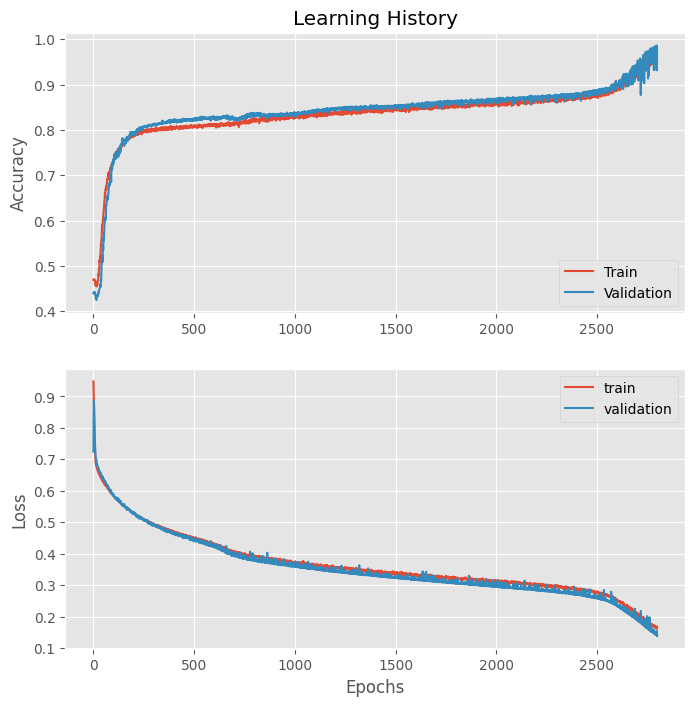

94/94 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9723


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.272875, G-Mean=0.988


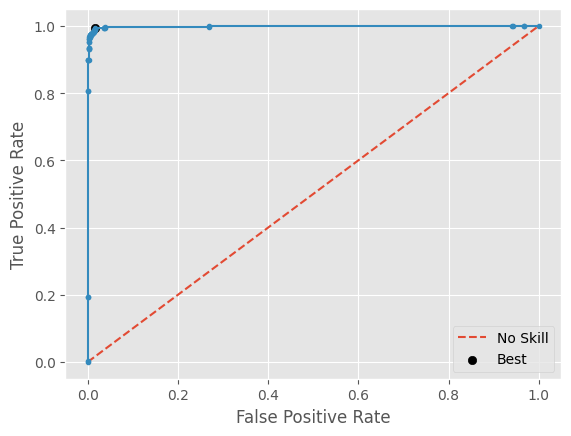

94/94 [==============================] - 0s 2ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2380
           1       0.94      0.99      0.96       620

    accuracy                           0.98      3000
   macro avg       0.97      0.99      0.98      3000
weighted avg       0.99      0.98      0.99      3000


---------------Confusion Matrix---------------



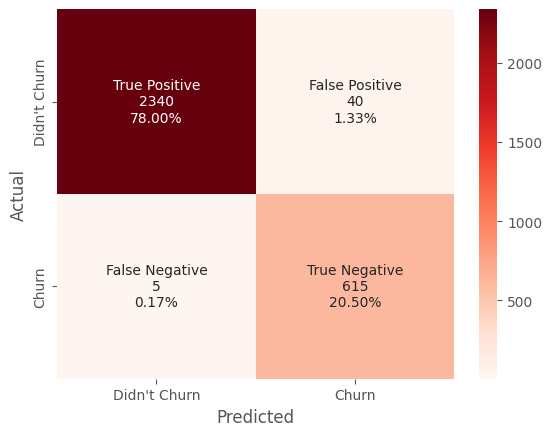

(<keras.callbacks.History at 0x7e01d0b78310>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_6 = ANN_classifier_V1_func('Adadelta' , X_train, y_train, X_test, y_test, 2800, 32, 2)
model_6

**Summary**

- In learning history plots, we can notice that both training and validation lines look more stabilized and less noisy during the training than the other models, also, the accuracy is gradually improved, and the loss is dropped as well. However, we will stop the training in 2800 epochs due to the validation line starting to have abnormal behavior or noise, and we don't want to be guilty of overfitting.
- The model performance metrics have been improved significantly in comparison to the other models, and we can say that it has generalized performance.
- Both false positive and false negative rates dropped by much compared to other models, even though the false positive of the second model is less than it in this model, but obviously this only happens due to the second model being biased toward the major class.
- Although this model is relatively slow to learn, when we trained our model **with adadelta optimizer by 2800 epochs**, that led us to have the best performance metrics results.



- **Model 7**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

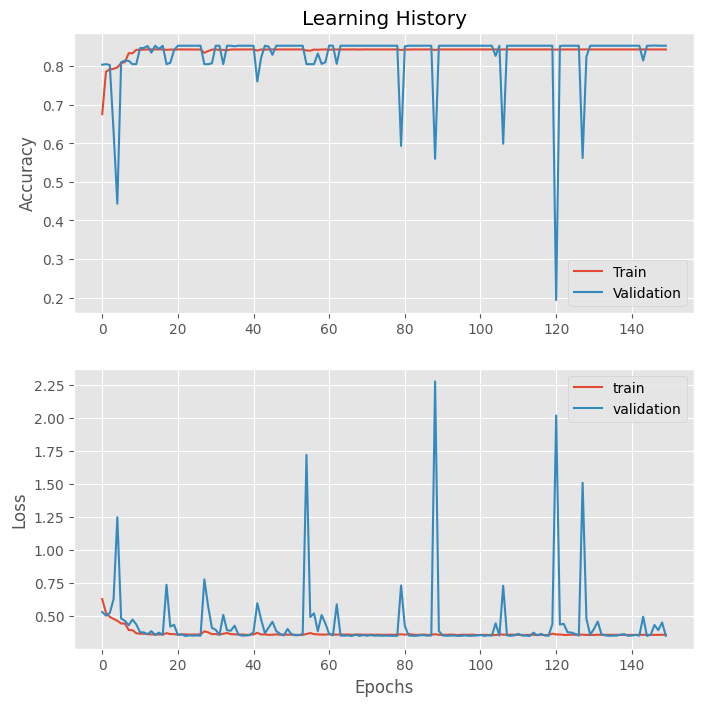

94/94 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8470


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.251668, G-Mean=0.631


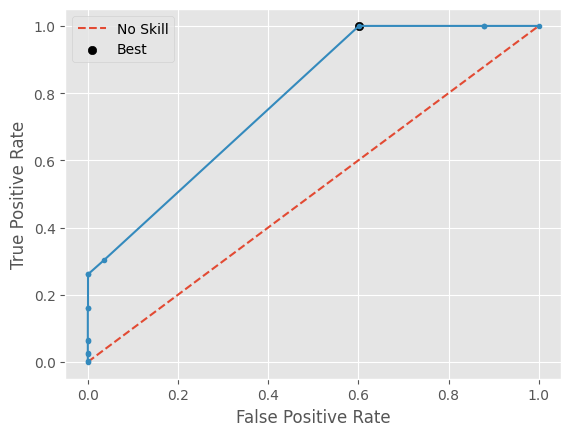

94/94 [==============================] - 0s 2ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2380
           1       0.69      0.30      0.42       620

    accuracy                           0.83      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.81      0.83      0.80      3000


---------------Confusion Matrix---------------



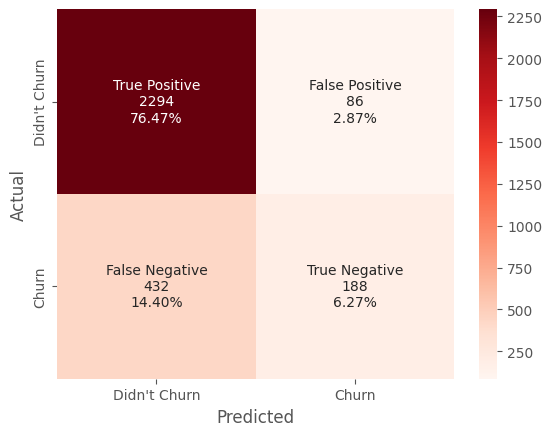

(<keras.callbacks.History at 0x7e01bf0d1c00>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model_7 = ANN_classifier_V1_func('Nadam' , X_train, y_train, X_test, y_test, 150, 64, 2)
model_7

**Summary**

- The learning history plots show us that there's a lot of noise present in the validation line, while the training line looks stable.

- This model performance is not that much better than the last two models, and as we know it's important to reduce the false positive and false negative rates, but with this model we can't say that we have a good false negative rate either.

### **Model V2 Function**


It's the same as the previous classifier with only a few differences:

- The activation function for the hidden layers that will be used with this architecture is **Tanh**.
- The callback in keras that will be used here is **Early Stopping** which will interrupt the training process when the validation loss is no longer improving after exactly 15 epochs.


*We will use different optimizers and number of epochs to identify the best solution.*

In [ ]:
def ANN_classifier_V2_func(optimizer, inds_train, target_train , inds_test, target_test, n_epochs, n_batchsize, n_verbose):

  #model building
  model = Sequential()
  #1st layer
  model.add(Dense(64, activation='tanh', input_shape=(12,)))
  model.add(BatchNormalization())
  #2nd layer
  model.add(Dense(32, activation='tanh'))
  model.add(BatchNormalization())
  #output layer
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer=optimizer , metrics=['accuracy'])
  print('---------------Model Summary---------------')
  print()
  print(model.summary())

  #training process
  print('---------------Training Process---------------')
  from keras.callbacks import EarlyStopping

  lr_ = EarlyStopping(monitor='val_loss', patience=15, mode='auto')

  history = model.fit(inds_train, target_train, validation_split=0.1,
                      batch_size=n_batchsize, epochs=n_epochs, callbacks=[lr_], verbose=n_verbose)

  history_df  = pd.DataFrame(history.history)
  history_df['epochs'] = history.epoch

  fig , (ax1, ax2) = plt.subplots(nrows=2,ncols=1, figsize=(8, 8))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('Learning History')
  ax1.set_ylabel('Accuracy')
  ax1.legend(['Train', 'Validation'], loc='lower right')

  ax2.plot(history_df['loss'])
  ax2.plot(history_df['val_loss'])
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epochs')
  ax2.legend(("train" , "validation") , loc =0)
  plt.show()

  #Printing results
  results = model.evaluate(inds_test, target_test)
  print('\n')

  #ROC_Curve
  from sklearn.metrics import roc_curve
  from matplotlib import pyplot

  print('---------------ROC-AUC Curve---------------')
  print()
  pred = model.predict(inds_test)
  pred = pred[:, 0]
  fpr, tpr, thresholds = roc_curve(target_test, pred)
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
  pyplot.plot(fpr, tpr, marker='.')
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  pyplot.show()

  predications = model.predict(inds_test)
  predications = (predications > thresholds[ix])

  #confusion_matrix #classfication_report
  from sklearn.metrics import confusion_matrix
  from sklearn import metrics

  print()
  print('---------------Classfication Report---------------')
  print()
  cr = metrics.classification_report(target_test, predications)
  print(cr)

  print()
  print('---------------Confusion Matrix---------------')
  print()

  cm = confusion_matrix(target_test, predications)

  labels = ['True Positive', 'False Positive', 'False Negative','True Negative']

  categories = [ 'Didn\'t Churn','Churn']

  #ns.heatmap(cm, annot=True, cmap='Reds')
  #plt.show()
  make_confusion_matrix_func(cm ,
                      group_names = labels,
                      categories = categories,
                      cmap ='Reds')
  return  history, make_confusion_matrix_func

- **Model 1**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

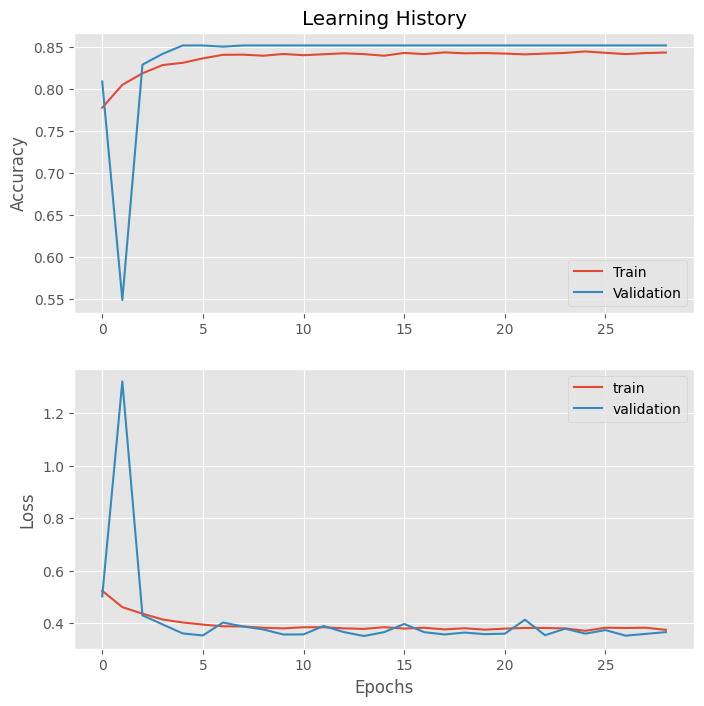

94/94 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8470


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.326208, G-Mean=0.645


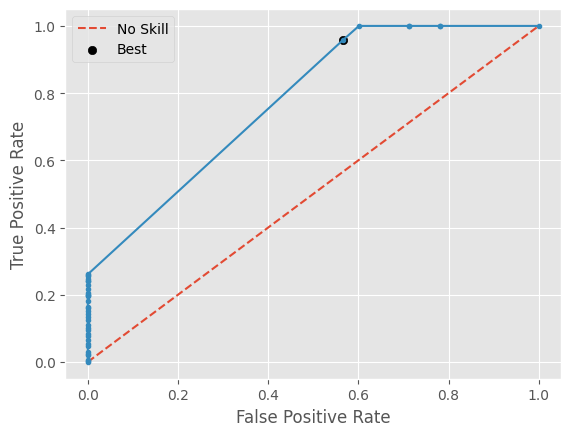

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2380
           1       0.99      0.26      0.41       620

    accuracy                           0.85      3000
   macro avg       0.92      0.63      0.66      3000
weighted avg       0.87      0.85      0.81      3000


---------------Confusion Matrix---------------



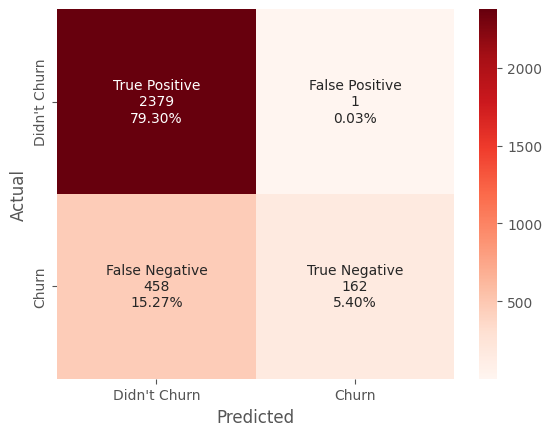

(<keras.callbacks.History at 0x7efe696dde40>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model1 = ANN_classifier_V2_func('adamax' , X_train, y_train, X_test, y_test, 200, 10, 2)
model1

**Summary**

- In the learning history plots, the training and validation lines look stable during the training, we can notice converging on a solution after about 5 epochs. The learning is shut down after 29 epochs where the changes in model performance are minor.

- From the confusion matrix we have false positive rate **0.03%** which is great. However, the false negative rate looks bad.

- The overall accuracy is **85%**,  but the recall of the minor class (1) is very poor compared to the upper-hand class (0).


- **Model 2**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

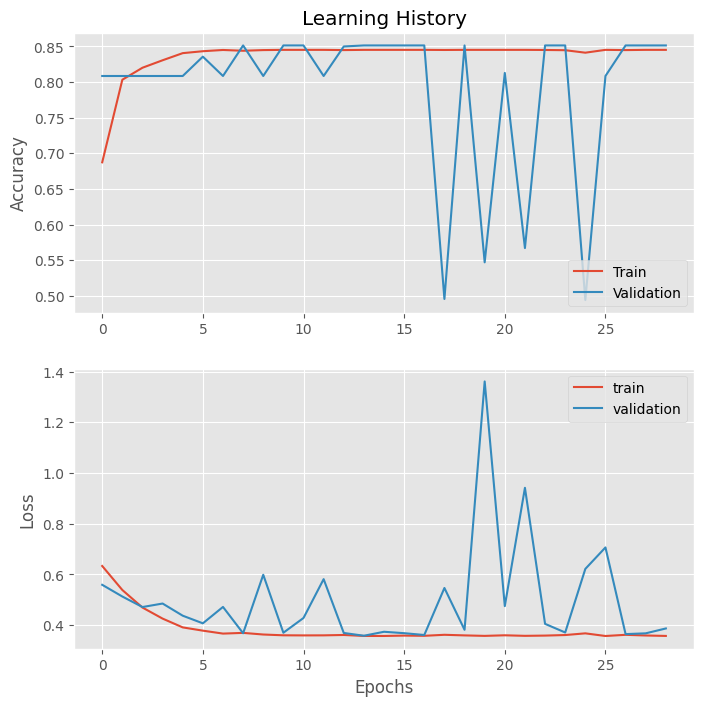

94/94 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8470


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.218569, G-Mean=0.644


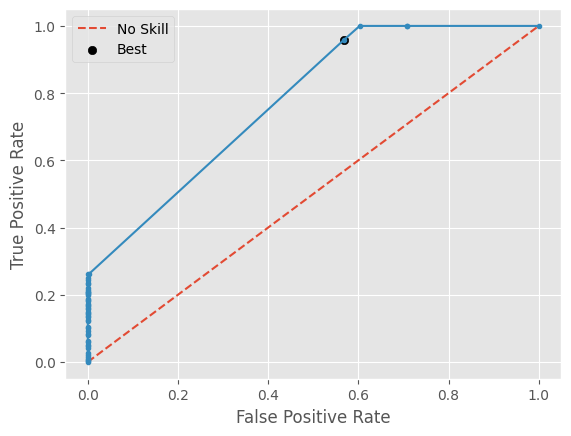

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2380
           1       0.97      0.26      0.41       620

    accuracy                           0.85      3000
   macro avg       0.90      0.63      0.66      3000
weighted avg       0.87      0.85      0.81      3000


---------------Confusion Matrix---------------



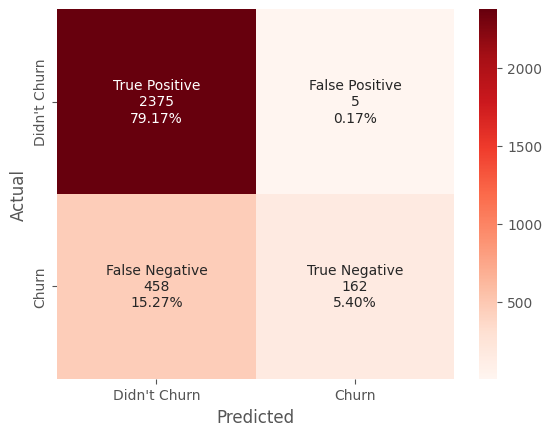

(<keras.callbacks.History at 0x7efe69cdbc70>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model2 =  ANN_classifier_V2_func('adam' , X_train, y_train, X_test, y_test, 50, 128, 2)
model2

**Summary**

- In the learning history plots, the training looks more stable than the validation line which looks noisy during the training. The learning is shut down after 29 epochs, the same as the previous model.

- Generally, using **Adam** optimizer doesn't seem to improve the model that much.

- **Model 3**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

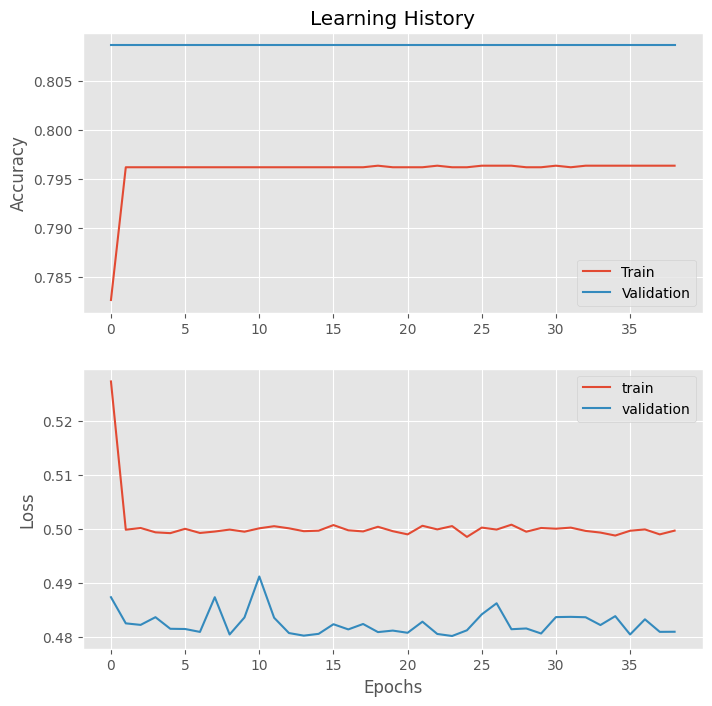

94/94 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7933


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.251109, G-Mean=0.550


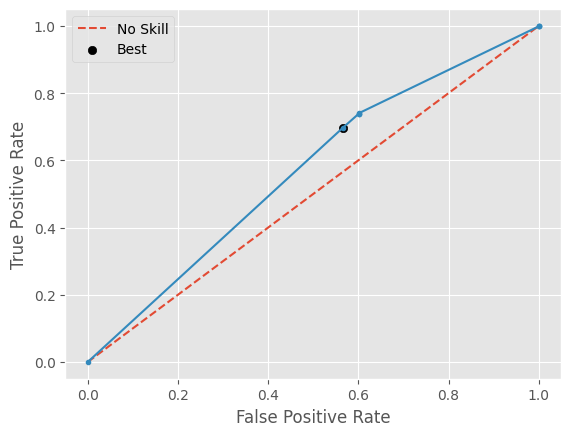

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2380
           1       0.00      0.00      0.00       620

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000


---------------Confusion Matrix---------------



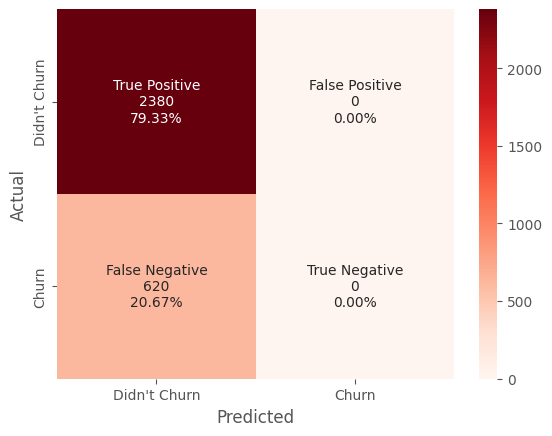

(<keras.callbacks.History at 0x7efe55bb3be0>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model3 = ANN_classifier_V2_func('SGD' , X_train, y_train, X_test, y_test, 50, 10, 2)
model3

**Summary**

- In the learning history plots, we can notice both training and validation lines are smooth, even though the validation accuracy looks slightly better than the training accuracy, and the learning is stopped after 39 epochs where the performance is not improving that much.

- Moreover, this model has performed terribly in predicting the customers who are planning to leave (class 1), and the performance metrics look highly unbalanced which suggests this model with **SGD** optimizer is biased toward the major class.


- **Model 4**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

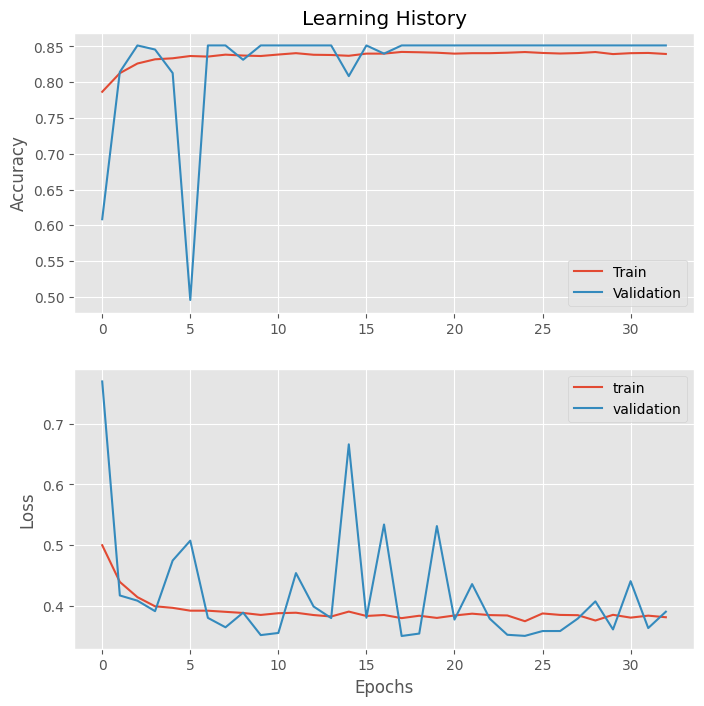

94/94 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8470


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.105526, G-Mean=0.645


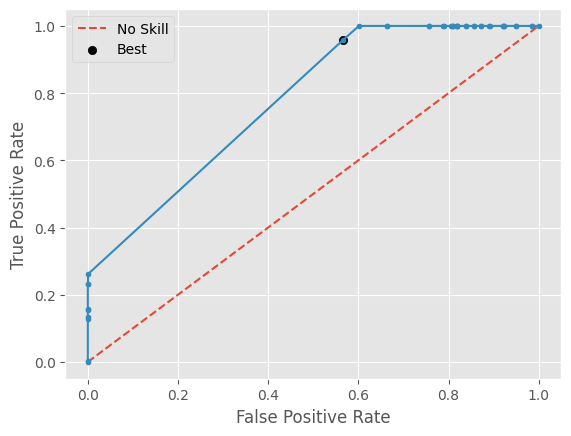

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2380
           1       0.99      0.26      0.41       620

    accuracy                           0.85      3000
   macro avg       0.92      0.63      0.66      3000
weighted avg       0.87      0.85      0.81      3000


---------------Confusion Matrix---------------



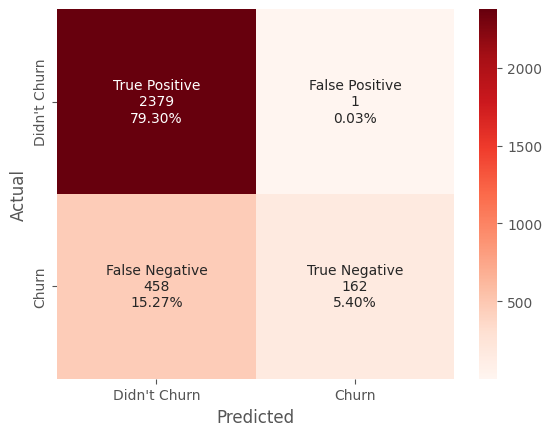

(<keras.callbacks.History at 0x7efe687ed540>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model4 = ANN_classifier_V2_func('RMSprop' , X_train, y_train, X_test, y_test, 50, 10, 2)
model4

**Summary**

- In the learning history plots, the training looks more stable than the validation line which looks noisy during the training, and the learning was shut down after 33 epochs.

- Even though the recall of class 1 has been improved compared to the model with SGD, the false negative rate is high.

- The model performance metrics look very unbalanced, clearly there's some bias in this model.

- **Model 5**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

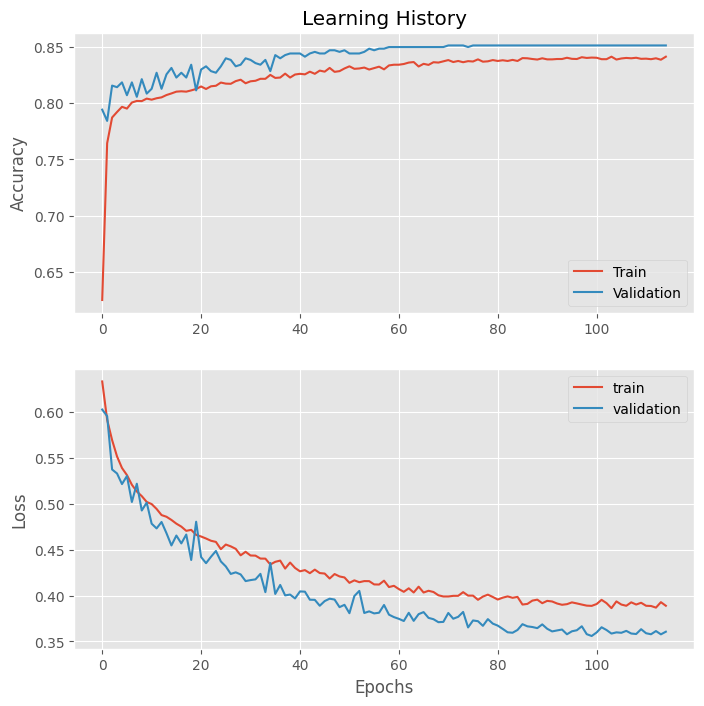

94/94 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8470


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.286087, G-Mean=0.645


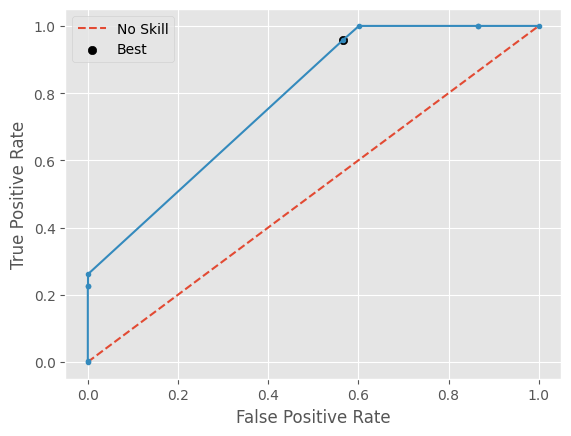

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2380
           1       0.99      0.26      0.41       620

    accuracy                           0.85      3000
   macro avg       0.92      0.63      0.66      3000
weighted avg       0.87      0.85      0.81      3000


---------------Confusion Matrix---------------



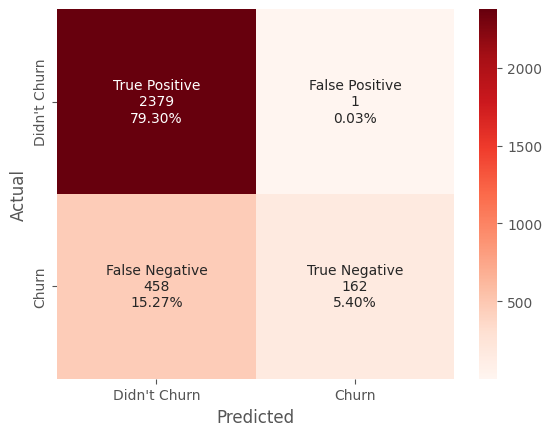

(<keras.callbacks.History at 0x7efe69868c40>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model5 = ANN_classifier_V2_func('Adagrad', X_train, y_train, X_test, y_test, 500, 10, 2)
model5

**Summary**

- From learning history plots, we can notice both training and validation lines look more stable than the previous models, however, the learning has been stopped after 115 epochs which takes longer than the previous models.

- When we used the model with the **Adagrad** optimizer,  the performance metrics are still the same, and there's no sign of improvement.

- **Model 6**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

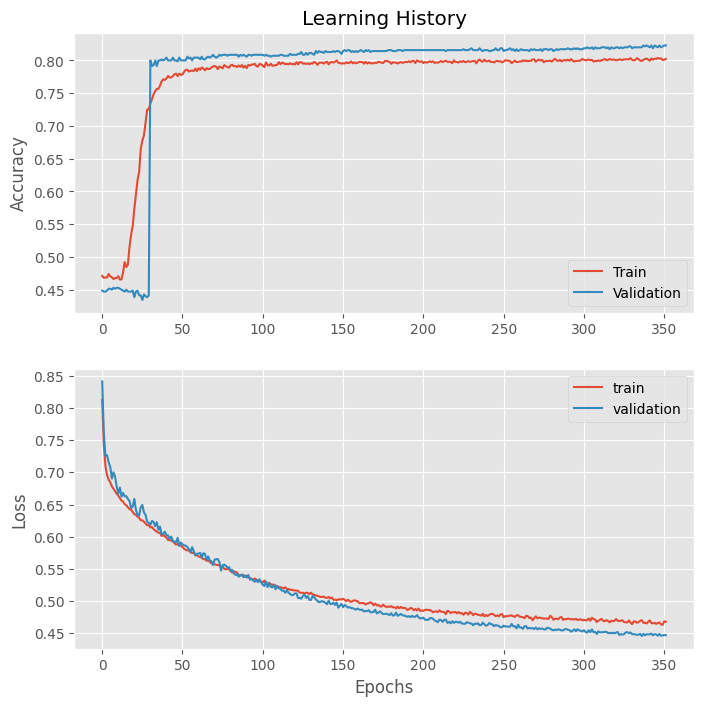

94/94 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8050


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.275988, G-Mean=0.566


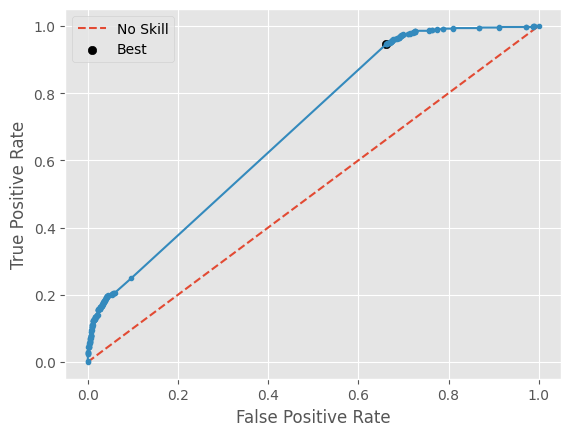

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.96      0.34      0.50      2380
           1       0.27      0.95      0.42       620

    accuracy                           0.46      3000
   macro avg       0.62      0.64      0.46      3000
weighted avg       0.82      0.46      0.48      3000


---------------Confusion Matrix---------------



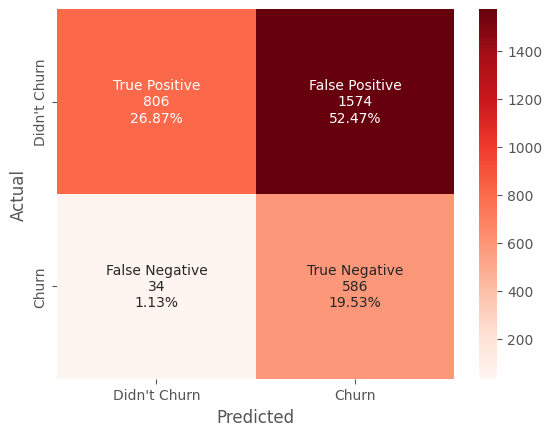

(<keras.callbacks.History at 0x7efe683d3e20>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model6 = ANN_classifier_V2_func('Adadelta' , X_train, y_train, X_test, y_test, 500, 10, 2)
model6

**Summary**

- In the learning history plots, the training and validation lines look more stable during the training, and we can notice converging after 30 epochs. However, the training was interrupted after 352, as that in our classifier function had to callback EarlyStopping() which would interrupt the training once there was no longer improving after 15 epochs.

- The model with **Adadelta** was able to improve the false negative rate by much compared to all the previous models, but it came at the cost of increasing the false positive rate, thus we still can't say we have a generalized model.

- It becomes obvious now that, no matter what the optimizer we used or the number of epochs, this model will be affected by the unbalance of the classes and will not give us a satisfactory solution. However, let us  try the last optimizer.


- **Model 7**

---------------Model Summary---------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total param

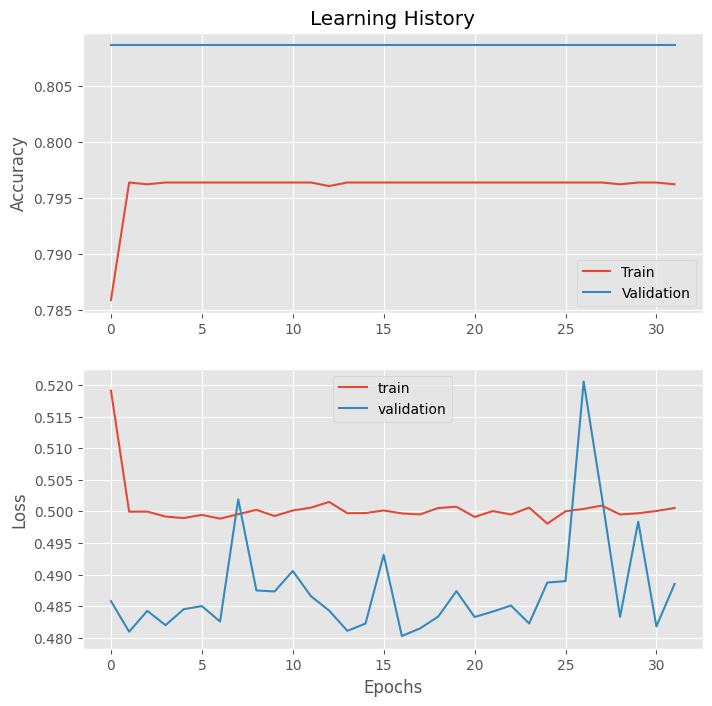

94/94 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7933


---------------ROC-AUC Curve---------------

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.228196, G-Mean=0.543


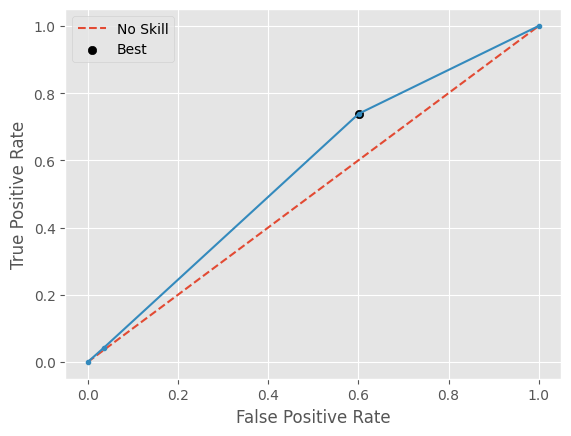

94/94 [==============================] - 0s 1ms/step

---------------Classfication Report---------------

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2380
           1       0.24      0.04      0.07       620

    accuracy                           0.77      3000
   macro avg       0.52      0.50      0.47      3000
weighted avg       0.68      0.77      0.71      3000


---------------Confusion Matrix---------------



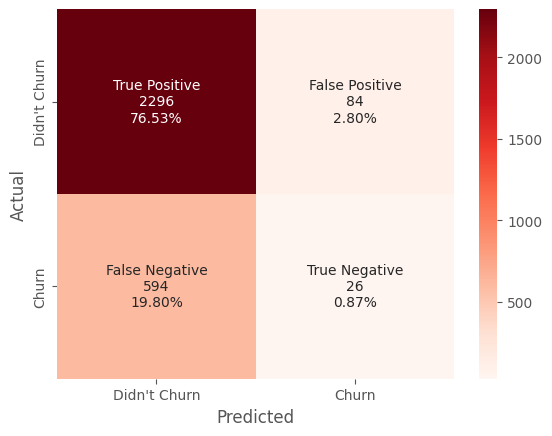

(<keras.callbacks.History at 0x7efe5bb15bd0>,
 <function __main__.make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Reds', title=None)>)

In [ ]:
backend.clear_session()

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

model7 = ANN_classifier_V2_func('Nadam' , X_train, y_train, X_test, y_test, 50, 10, 2)
model7

**Summary**

- In the learning history plots, the accuracy of the training and validation lines look stable during the training and we can notice that the validation accuracy is slightly better than training. However, in the loss plot the validation line looks noisy and unstable, and after 32 epochs the training has been stopped where there's no much improvement.

- Similar to the previous models with the other different optimizers the false positive rate is always low compared to the false negative rate which is high for this problem.

## **Conclusion**


- From our earlier analysis, we found that the chances of the churn are high for those customers who complained before, thus the bank has to keep a close eye toward those customers, since they are the most likely to leave, and must set a strategic plan to prevent them from churn, now the fact the bank know have this information that a complaint is vital factor to retain the customers or not.

- Moreover, the churn is more among customers either from german or females.In which we may say, if the customer is german women who did complain before, thus this customer has a higher chances to churn than any other customers.

- The first ANN classifier with **Adadelta optimizer and 2800 epochs** has the best performance, and it's our best solution so far. Of course, it took more epochs to use during training the model, and it was slow to learn as we observed, but it did a satisfactory job compared to all the other models.


- Otherwise , the other models were either biased toward the upper-hand class, unstable during the training process, or have poor performance. Also, we can go further and try to tune these model hyperparameters that will lead us to identify the best learning rate and batch size that will help to get out the local optima.

